# Sentence classification using EmotivITA dataset.

Multilingual Natural Language Processing 2024 Homework 1B

Author: Yusupha Juwara

To run the notebook on Colab, click on [this link](https://colab.research.google.com/drive/1JmfgJB_s8EowsYJOTHrSCH_L3zv0SbHD?usp=sharing)

In [ ]:
# !nvidia-smi

In [ ]:
# @title Setup

try:
    import spacy
    # Load the italian model
    nlp_spacy = spacy.load("it_core_news_sm")
except: # ImportError
    # Install spacy for lemmatization instead of nltk bec it works better.
    !pip install -q spacy
    !python -m spacy download it_core_news_sm

    # Restart the environment after installing packages to reload dependencies
    # exit()

    # Note that this doesn't reload and use the newly installed/updated libraries if the old ones exist.
    # To reload the newest ones, uncomment the exit() above and read the above cell.
    import spacy
    # Load the italian model
    nlp_spacy = spacy.load("it_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# @title Spacy
# import spacy
# nlp_spacy = spacy.load("it_core_news_sm")

# Example
# nlp("ciao caro, come va?").similarity(nlp("buona giornata"))
# Analyze the text
doc = nlp_spacy("Ciao caro, com'è? Te ne vai a dormire? ")

# Extract lemmas from the analysed words
# Notice that it converts it lower case and lemmatizes it
print([token.lemma_ for token in doc])

print("Stop words: ", nlp_spacy.Defaults.stop_words)

nlp_spacy("è")[0].lemma_

['ciao', 'caro', ',', 'come', 'essere', '?', 'te', 'ne', 'vaire', 'a', 'dormire', '?']
Stop words:  {'casa', 'tutte', 'facendo', 'col', 'dello', 'essi', 'intanto', 'sarete', 'fino', 'pero', 'aveste', 'co', 'eri', 'fossimo', 'avrei', 'chi', 'delle', 'stesti', 'foste', 'ansa', 'della', 'vostro', 'ed', 'peggio', 'trenta', 'sulla', 'uomo', 'farebbero', 'gruppo', 'senza', "d'", "c'", 'press', 'cui', 'mia', 'quelli', 'visto', 'quel', 'dove', 'ebbe', 'faccia', 'facemmo', 'ha', 'fosse', 'dai', 'percio', 'ulteriore', 'nuovo', 'od', 'ai', 'cioe', 'parecchie', 'essere', 'fecero', 'le', 'ora', 'però', 'parte', 'luogo', 'possedere', 'intorno', 'sei', 'spesso', 'stessero', 'diventato', 'qui', 'noi', 'avendo', 'avuta', 'gliele', 'poiche', 'degli', 'via', 'dovunque', 'sette', 'sarò', 'attesa', 'oppure', 'staranno', 'suoi', 'esse', 'possa', 'forza', 'seguito', 'preferibilmente', 'ancora', 'nessun', 'nei', 'purtroppo', 'città', 'diventare', 'facesti', 'per', 'esser', 'feci', 'avessero', 'fummo', 'subito

'essere'

In [ ]:
# @title Imports
import json
from pathlib import Path
from collections import Counter, OrderedDict
import random
# Import itertools
import itertools

import torch
from torch import nn
from torch.nn import functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torch.nn.utils.rnn import pack_padded_sequence

import re

import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import torch
from torchtext.data.utils import get_tokenizer
from sklearn.feature_extraction.text import CountVectorizer

from torchtext.vocab import vocab, Vocab, GloVe, build_vocab_from_iterator

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

import matplotlib.pyplot as plt
from typing import List, Dict, Any, Union, Optional, Tuple, NamedTuple, Callable
import torch.optim.lr_scheduler as lr_scheduler
from tqdm import tqdm
from dataclasses import dataclass, field

In [ ]:
%%capture
!pip install watermark

#load
%load_ext watermark

#To view all available commands
# %watermark?


In [ ]:
%watermark -a "Yusupha Juwara" -i -u -v -w -iv -p tqdm
%watermark -p sklearn

Author: Yusupha Juwara

Last updated: 2024-04-30T13:52:29.525888+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

tqdm: 4.66.2

pandas    : 2.0.3
torch     : 2.2.1+cu121
matplotlib: 3.7.1
json      : 2.0.9
spacy     : 3.7.4
numpy     : 1.25.2
re        : 2.2.1

Watermark: 2.4.3

sklearn: 1.2.2



In [ ]:
# @title Set the random seed for reproducibility
seed = 42
# Python random seed
random.seed(seed)

# NumPy random seed
np.random.seed(seed)

# PyTorch random seed for CPU
torch.manual_seed(seed)

# PyTorch CUDA random seed (for GPU training)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# PyTorch deterministic operations
# (optional, but recommended for reproducibility)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Tensorflow random seed
# import tensorflow as tf
# tf.random.set_seed(42)


In [ ]:
# @title create logger
import logging
logger = logging.getLogger('HM1B')
logger.setLevel(logging.DEBUG)

# logging.basicConfig()

# Example usage
logger.debug('This is my 😂 debug message ')
logger.info('This is my 💜 info message ')
logger.warning('This is my 🤔 warning message ')
logger.error('This is my error 😱message ')
logger.critical('This is my 😭 critical message ')

DEBUG:HM1B:This is my 😂 debug message 
INFO:HM1B:This is my 💜 info message 
ERROR:HM1B:This is my error 😱message 
CRITICAL:HM1B:This is my 😭 critical message 


In [ ]:
# @title Download and unzip the Data

import os
import gdown
import zipfile

def download_and_unzip(gdrive_file_link, output_folder):
    """
    Download a ZIP file from a Google Drive link and extract its contents.

    Args:
        gdrive_file_link (str): The Google Drive file link.
        output_folder (str): The path to the output folder where the ZIP file will be extracted.
    """
    os.makedirs(output_folder, exist_ok=True)

    # Get the file ID from the Google Drive link
    file_id = gdrive_file_link.split('/')[-2]

    # Construct the correct download link
    gdrive_download_link = f"https://drive.google.com/uc?id={file_id}"

    # Download the ZIP file
    zip_file_path = os.path.join(output_folder, "downloaded_file.zip")
    gdown.download(gdrive_download_link, zip_file_path, quiet=False)

    # Extract the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_folder)

    # Remove the downloaded ZIP file
    os.remove(zip_file_path)

    print(f"Downloaded and extracted files from {gdrive_file_link} to {output_folder}")

# Example usage
gdrive_file_link = "https://drive.google.com/file/d/1is7Yk6rK_ijluhmpHzcM9RJcEFT-4ajL/view?usp=sharing"
output_folder = Path.cwd() / "data"
download_and_unzip(gdrive_file_link, str(output_folder))

Downloading...
From: https://drive.google.com/uc?id=1is7Yk6rK_ijluhmpHzcM9RJcEFT-4ajL
To: /content/HM1_A-1936515/downloaded_file.zip
100%|██████████| 2.48M/2.48M [00:00<00:00, 209MB/s]

Downloaded and extracted files from https://drive.google.com/file/d/1is7Yk6rK_ijluhmpHzcM9RJcEFT-4ajL/view?usp=sharing to /content/HM1_A-1936515


In [ ]:
# @title File Paths and Config Dataclasses

@dataclass
class FilePaths:
    working_folder: Path = "data/HM1_A-1936515/task-0-emotivita"
    train_path_arousal: Path = "data/HM1_A-1936515/task-0-emotivita/EmotivITA_Arousal_dev.jsonl"
    train_path_valence: Path = "data/HM1_A-1936515/task-0-emotivita/EmotivITA_Valence_dev.jsonl"
    train_path_dominance: Path = "data/HM1_A-1936515/task-0-emotivita/EmotivITA_Dominance_dev.jsonl"
    test_path_arousal: Path = "data/HM1_A-1936515/task-0-emotivita/EmotivITA_Arousal_test.jsonl"
    test_path_valence: Path = "data/HM1_A-1936515/task-0-emotivita/EmotivITA_Valence_test.jsonl"
    test_path_dominance: Path = "data/HM1_A-1936515/task-0-emotivita/EmotivITA_Dominance_test.jsonl"

file_paths = FilePaths()

@dataclass
class Config:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    batch_size = 128
    learning_rate = 3e-5
    epochs = 300
    patience = 15

    use_pretrain = False

    max_vocab_size = 2**13
    max_sequence_length = 2**10
    embedding_size = 300
    hidden_size = 256
    num_layers = 2
    bidirectional = True
    dropout = 0.2
    momentum = 0.9
    weight_decay = 0.0005
    padding_id = None
    input_size = None
    num_classes = 3
    seed = 42
    train_split = 0.8

    remove_punctuation = True
    remove_stopwords = True
    lemmatization = False

    # Convert choices to numerical representations
    choice_mapping: dict = field(default_factory=lambda: {'Alta': 2, 'Media': 1, 'Bassa': 0})
    # Note that this is to avoid modifying the field by every instance of the class
    # https://stackoverflow.com/questions/53632152/why-cant-dataclasses-have-mutable-defaults-in-their-class-attributes-declaratio
    # choice_mapping: dict = {'Alta': 2, 'Media': 1, 'Bassa': 0} # Error in @dataclass

    pad_token: str = "<pad>"
    unk_token: str = "<unk>"
    extra_tokens: list[str] = field(default_factory=lambda: [])

config = Config()


## Dataset Preprocessing step 1 for Count Vectorizer

- In this section, we will start off with a simple data preprocessing called Bag-of-Words (BoW). We will be using the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from Scikit-Learn to process our data.

- It is always important to inspect and understand your data before training a model. Otherwise, you'd be training 'Monsters' as the prof said. We can use the [Matplotlib](https://matplotlib.org/) and the [Seaborn](https://seaborn.pydata.org/) libraries to visualize our data.

- Note that both the three 'dimensions' (Arousal, Valence, and Dominance) share the same sentences but not necessarily the same values for the labels.
- Also note that the choices were randomized in the original dataset so as to prevent models from memorizing the order of the choices. There is a paper on this!.

In [ ]:
!ls {file_paths.working_folder}

download_data.py	       EmotivITA_Dominance_test.jsonl  scripts.py
EmotivITA_Arousal_dev.jsonl    EmotivITA_Valence_dev.jsonl     task-0-emotivita_prompt.jsonl
EmotivITA_Arousal_test.jsonl   EmotivITA_Valence_test.jsonl    task-0-emotivita_Report.pdf
EmotivITA_Dominance_dev.jsonl  __init__.py


In [ ]:
!head {file_paths.train_path_arousal}

{"text": "Auguriamo a voi e alla vostra famiglia un nuovo anno pieno di gioia e amore.", "choices": ["Media", "Alta", "Bassa"], "label": 2, "dimension": "Arousal"}
{"text": "Ha anche respinto le notizie secondo cui le sue dimissioni derivavano dalla delusione che il posto di direttore generale non avesse portato anche a una direzione del consiglio di amministrazione dell'agenzia di notizie con sede a Londra.", "choices": ["Media", "Alta", "Bassa"], "label": 2, "dimension": "Arousal"}
{"text": "27 aprile 2009 12:07 Padraic Ryan: Oggetto: regolamentazione delle emissioni - non dovresti usare la crisi finanziaria come scusa per cancellare l'intera economia.", "choices": ["Media", "Bassa", "Alta"], "label": 2, "dimension": "Arousal"}
{"text": "I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.", "choices": ["Bassa", "Media", "Alta"], "label": 2, "dimension": "Arousal"}
{"text": "Stiamo aiutando a

In [ ]:
# Same text as above, but different labels
!head {file_paths.train_path_valence}

{"text": "Auguriamo a voi e alla vostra famiglia un nuovo anno pieno di gioia e amore.", "choices": ["Bassa", "Media", "Alta"], "label": 2, "dimension": "Valence"}
{"text": "Ha anche respinto le notizie secondo cui le sue dimissioni derivavano dalla delusione che il posto di direttore generale non avesse portato anche a una direzione del consiglio di amministrazione dell'agenzia di notizie con sede a Londra.", "choices": ["Media", "Bassa", "Alta"], "label": 0, "dimension": "Valence"}
{"text": "27 aprile 2009 12:07 Padraic Ryan: Oggetto: regolamentazione delle emissioni - non dovresti usare la crisi finanziaria come scusa per cancellare l'intera economia.", "choices": ["Media", "Bassa", "Alta"], "label": 1, "dimension": "Valence"}
{"text": "I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.", "choices": ["Bassa", "Media", "Alta"], "label": 1, "dimension": "Valence"}
{"text": "Stiamo aiutando a

In [ ]:
# Same text as above, but different labels
!head {file_paths.train_path_dominance}

{"text": "Auguriamo a voi e alla vostra famiglia un nuovo anno pieno di gioia e amore.", "choices": ["Alta", "Media", "Bassa"], "label": 0, "dimension": "Dominance"}
{"text": "Ha anche respinto le notizie secondo cui le sue dimissioni derivavano dalla delusione che il posto di direttore generale non avesse portato anche a una direzione del consiglio di amministrazione dell'agenzia di notizie con sede a Londra.", "choices": ["Bassa", "Alta", "Media"], "label": 2, "dimension": "Dominance"}
{"text": "27 aprile 2009 12:07 Padraic Ryan: Oggetto: regolamentazione delle emissioni - non dovresti usare la crisi finanziaria come scusa per cancellare l'intera economia.", "choices": ["Media", "Bassa", "Alta"], "label": 1, "dimension": "Dominance"}
{"text": "I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.", "choices": ["Media", "Alta", "Bassa"], "label": 2, "dimension": "Dominance"}
{"text": "Stiamo ai

In [ ]:
!head {file_paths.test_path_arousal}

{"text": "È vero che il film di Moore a volte è involontariamente ingannevole, ma definirlo disonesto è un'iperbole estrema.", "choices": ["Alta", "Bassa", "Media"], "label": 2, "dimension": "Arousal"}
{"text": "Influenza aviaria letale confermata nei tacchini britannici", "choices": ["Media", "Alta", "Bassa"], "label": 1, "dimension": "Arousal"}
{"text": "Sarti e casalinghe occupati mentre i musulmani celebrano l'Eid", "choices": ["Bassa", "Alta", "Media"], "label": 2, "dimension": "Arousal"}
{"text": "Poiché siete un'organizzazione che ci tiene, siete invitati a diventare parte integrante di questo favoloso evento diventando uno sponsor aziendale per la 99 Asta del JCC.", "choices": ["Media", "Bassa", "Alta"], "label": 2, "dimension": "Arousal"}
{"text": "I sandinisti Thomas Borge e i fratelli Ortega sono protetti da Castro, che sostenne la loro conquista del Nicaragua.", "choices": ["Media", "Bassa", "Alta"], "label": 2, "dimension": "Arousal"}
{"text": "I bambini hanno bisogno dell

### Load Data

Let's define a helper funtion to load the data in a pandas dataframe, and manipulate it.

In [ ]:
# @title load_data helper function

def load_data(file_path) -> list[dict]:
    data = []
    with open(file_path, "r") as f:
        for line in f:
            sample = json.loads(line.strip())
            data.append({
                'text': sample["text"],
                'label': sample["label"],
                'choices': sample["choices"],
                'dimension': sample["dimension"]
            })
    data = pd.DataFrame(data)
    return data


train_df_arousal = load_data(file_paths.train_path_arousal)
train_df_valence = load_data(file_paths.train_path_valence)
train_df_dominance = load_data(file_paths.train_path_dominance)

# Concat all the dataframes
train_df_1 = pd.concat([train_df_arousal, train_df_valence, train_df_dominance], ignore_index=True, axis=0)
train_df_1

,text,label,choices,dimension
0,Auguriamo a voi e alla vostra famiglia un nuov...,2,"[Media, Alta, Bassa]",Arousal
1,Ha anche respinto le notizie secondo cui le su...,2,"[Media, Alta, Bassa]",Arousal
2,27 aprile 2009 12:07 Padraic Ryan: Oggetto: re...,2,"[Media, Bassa, Alta]",Arousal
3,I drastici cambi di tempo e metro e le prime a...,2,"[Bassa, Media, Alta]",Arousal
4,Stiamo aiutando a sviluppare,0,"[Media, Bassa, Alta]",Arousal
...,...,...,...,...
23995,Non dimenticare che è la tua ragazza.,1,"[Bassa, Media, Alta]",Dominance
23996,"Frank Sinatra, Wayne Newton e Louis Prima arri...",1,"[Bassa, Alta, Media]",Dominance
23997,Riferimenti,2,"[Alta, Media, Bassa]",Dominance
23998,Il maltempo annulla la discesa libera maschile.,2,"[Alta, Media, Bassa]",Dominance


### Randomize Choices

Since we already said that the choices were randomized in the original task so as to learn the actual meanings of the choices rather than their orderings, then to plot the data distribution based on the choices and labels, we need to have the non-randomized choices, i.e, the reversed process.
- E.g., choices=['Alto', 'Bassa', 'Media'], label=1 ('Bassa') -> choices_mapped = ['Bassa', 'Media', 'Alto'], label_mapped=0 ('Bassa')

This way we can plot the data distribution based on the labels, do stratified splitting based on the labels, etc

In [ ]:
# @title Labels Remap
def label_to_choice(row):
    label = row['label']
    choices = row['choices']
    return config.choice_mapping[choices[label]]

train_df_1['label_remapped'] = train_df_1.apply(label_to_choice, axis=1)
# remove duplicates
train_df_1.drop_duplicates(subset=['text', 'dimension', 'label_remapped'], inplace=True)
train_df_1


,text,label,choices,dimension,label_remapped
0,Auguriamo a voi e alla vostra famiglia un nuov...,2,"[Media, Alta, Bassa]",Arousal,0
1,Ha anche respinto le notizie secondo cui le su...,2,"[Media, Alta, Bassa]",Arousal,0
2,27 aprile 2009 12:07 Padraic Ryan: Oggetto: re...,2,"[Media, Bassa, Alta]",Arousal,2
3,I drastici cambi di tempo e metro e le prime a...,2,"[Bassa, Media, Alta]",Arousal,2
4,Stiamo aiutando a sviluppare,0,"[Media, Bassa, Alta]",Arousal,1
...,...,...,...,...,...
23995,Non dimenticare che è la tua ragazza.,1,"[Bassa, Media, Alta]",Dominance,1
23996,"Frank Sinatra, Wayne Newton e Louis Prima arri...",1,"[Bassa, Alta, Media]",Dominance,2
23997,Riferimenti,2,"[Alta, Media, Bassa]",Dominance,0
23998,Il maltempo annulla la discesa libera maschile.,2,"[Alta, Media, Bassa]",Dominance,0


label_remapped
1    11264
2     7250
0     5290
Name: count, dtype: int64

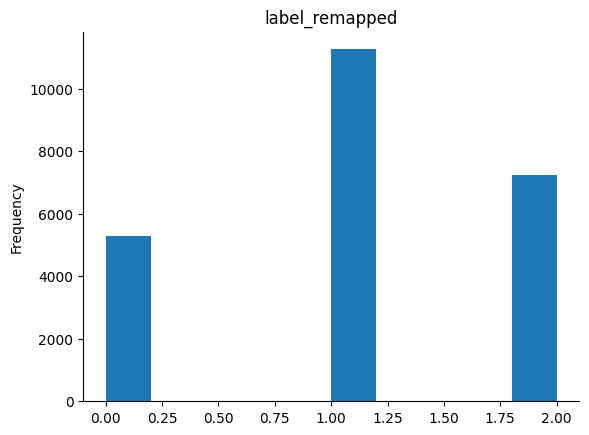

In [ ]:
# @title label_remapped plot
# This is the correct data distribution plot.

train_df_1['label_remapped'].plot(kind='hist', bins=10, title='label_remapped')
plt.gca().spines[['top', 'right',]].set_visible(False)

train_df_1['label_remapped'].value_counts()

label
0    7987
2    7950
1    7867
Name: count, dtype: int64

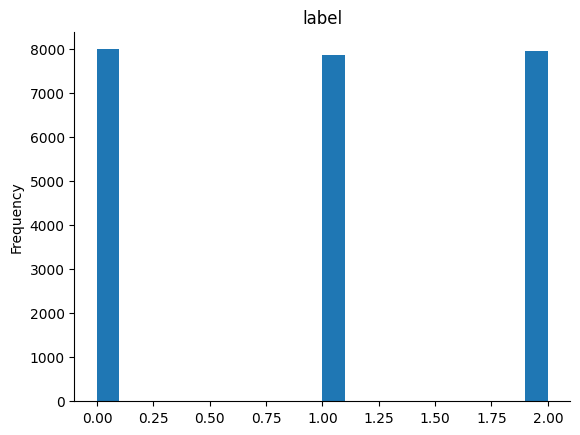

In [ ]:
# @title Plot (incorrect) label distribution

train_df_1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Almost uniform,  but incorrect.
train_df_1['label'].value_counts()

After loading the datasets, we can begin with the most basic classification methods: Random sampling, Weighted Random sampling, Majority class, and a bit more advanced Logistic Regression with just one layer and a softmax.

This way, we can see how our models comapre with these baselines later.

In [ ]:
# Let's load only one test dataset for the random samplings
test_df_arousal = load_data(file_paths.test_path_arousal)
test_df_valence = load_data(file_paths.test_path_valence)
test_df_dominance = load_data(file_paths.test_path_dominance)

test_df_1 = pd.concat([test_df_arousal, test_df_valence, test_df_dominance], axis=0)
test_df_1['label_remapped'] = test_df_1.apply(label_to_choice, axis=1)
test_df_1

,text,label,choices,dimension,label_remapped
0,È vero che il film di Moore a volte è involont...,2,"[Alta, Bassa, Media]",Arousal,1
1,Influenza aviaria letale confermata nei tacchi...,1,"[Media, Alta, Bassa]",Arousal,2
2,Sarti e casalinghe occupati mentre i musulmani...,2,"[Bassa, Alta, Media]",Arousal,1
3,"Poiché siete un'organizzazione che ci tiene, s...",2,"[Media, Bassa, Alta]",Arousal,2
4,I sandinisti Thomas Borge e i fratelli Ortega ...,2,"[Media, Bassa, Alta]",Arousal,2
...,...,...,...,...,...
2057,"La leggenda cinese di Madame Serpe Bianca, il ...",0,"[Media, Bassa, Alta]",Dominance,1
2058,"Ma soprattutto, mi chiedo cosa succederà quand...",1,"[Media, Bassa, Alta]",Dominance,0
2059,Shenzhen è stata la prima Zona Economica Speci...,1,"[Alta, Media, Bassa]",Dominance,1
2060,"Grazie, Artù.",2,"[Alta, Bassa, Media]",Dominance,1


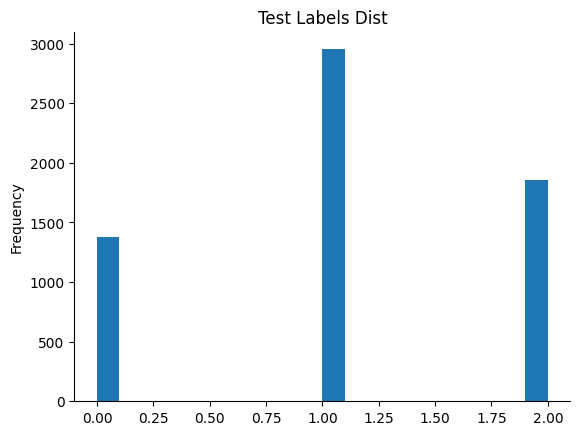

In [ ]:
# @title test labels distribution

from matplotlib import pyplot as plt
test_df_1['label_remapped'].plot(kind='hist', bins=20, title='Test Labels Dist')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Random Sampling

Let's see how random sampling works with this dataset.

- There is no training because we only have to randomly sample between the number of classes, in this case 3 classes.
- Evaluation is the same as the training part: random sample
- Testing and Predicting unseen data is also the same as the training part: random sample

In [ ]:
from sklearn.model_selection import StratifiedKFold
np.random.seed(seed)

# Random sampling
def random_sampling_test(df: pd.DataFrame, n_times: int=10) -> np.ndarray:
    """Randomly samples from 3 classes for len(df) number of times.
    Note that the dataset is used only for the len calculation, not for fitting any model nor for a weighted sampling.
    """

    texts = df['text'].tolist()
    labels = df['label'].tolist()
    scores = []

    for _ in range(n_times):
        rand_scores = np.random.choice([0, 1, 2], size=len(texts), replace=True)
        # fold_score = f1_score(labels, rand_scores, average='macro')
        fold_score = accuracy_score(labels, rand_scores)
        scores.append(fold_score)

    return np.array(scores).mean()

avg_score = random_sampling_test(test_df_1, 1000)
avg_score


0.33312269641125125

After averaging over many runs, the average accuracy is approximately the theoretical random sampling value between three classes, i.e. $\approx \frac{1}{3}$. This is expected!

## Weighted Random Sampling

- We use the training data for calculating the wweights for each class to be used in the sampling process.
- Then for testing, we simply sample using the already weighted probability distribution.

In [ ]:

np.random.seed(seed)
class WeightedSampling:

  def __init__(self):

      self.weights = None

  def train(self, df: pd.DataFrame, n_times: int=10):

      y = df['label_remapped'].tolist()

      values, counts = np.unique(y, return_counts=True)
      self.weights = counts/counts.sum()

      print(f"Values: {values}, Counts: {counts}, Weights: {self.weights}")

  def test(self, df: pd.DataFrame, n_times: int=10):

      assert self.weights is not None, "Please call .train() first"

      y = df['label_remapped'].tolist()

      scores = []
      for _ in range(n_times):
          choices = np.random.choice([0, 1, 2], size=len(y), p=self.weights, replace=True)
          score = accuracy_score(y, choices)
          scores.append(score)

      return np.array(scores).mean()

weighted_sampling = WeightedSampling()
weighted_sampling.train(train_df_1)
avg_score = weighted_sampling.test(test_df_1, 1000)
print(f"Mean accuracy score: {avg_score}")

Values: [0 1 2], Counts: [ 5290 11264  7250], Weights: [0.22223156 0.47319778 0.30457066]
Mean accuracy score: 0.3668446492078888


This is just slightly better than the non-weighted random sampling above.

## Majority Classifier

- During training, it simply stores the majority class label
- During Testing, it simply returns the majority class label of the training dataset already calculated in the training phase

In [ ]:

class MajorityVoting:
    def __init__(self):
        self.majority = None

    def train(self, df: pd.DataFrame):
        y = df['label_remapped'].tolist()
        values, counts = np.unique(y, return_counts=True)
        weights = counts/counts.sum()

        self.majority = values[np.argmax(counts)]

        print(f"Values: {values}, Counts: {counts}, Probability Distribution: {weights}, Majority Label: {self.majority}")

    def test(self, df: Optional[pd.DataFrame]= None):
        assert self.majority is not None, "Please call .train() first"

        y = df['label_remapped'].tolist()
        majority_class = [ self.majority for _ in range(len(y))]

        score = accuracy_score(y, majority_class)
        return score

majority_voting = MajorityVoting()
majority_voting.train(train_df_1)
score = majority_voting.test(test_df_1)
print(f"Accuracy score: {score}")

Values: [0 1 2], Counts: [ 5290 11264  7250], Probability Distribution: [0.22223156 0.47319778 0.30457066], Majority Label: 1
Accuracy score: 0.47736825088910445


This majority voting classifier performs better than the previous two by more than 10%.

Now let's move to another baseline that tweaks model parameters to improve performance.

I will implement Logistic Regression as this baseline with just a single layer; no activation functions, no fancy stuff.

But before doing that, we need to first preprocess the data suitable for the Logistic Regression model. Let's do that in the next cell.

## Dataset Preprocessing step 1  for CountVectorizer suitable for Logistic Regression

- Remove punctuations
- Remove stopwords
- Lemmatize:
   - Note: Lemmatization requires a large amount of time and memory.
   - [Lemmatization vs Stemming]( https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming)

In [ ]:
# @title Preprocess Data

def preprocess_data(df: pd.DataFrame, config: Config):

    # df['label'] = df['label'].astype(int)

    # Replace all punctuation with space. "un'organizzazione che ci tiene, si" -> "un organizzazione che ci tiene  si"
    df['tokens'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x)) # Remove punctuation
    logger.debug(f"Remove punctuation: \n{df['tokens'][:5]}\n")

    # split
    df['tokens'] = df['tokens'].apply(lambda x: x.lower().split())

    stop_words = set(nlp_spacy.Defaults.stop_words)
    # tokens = [w for w_list in df['tokens'] for w in w_list if w not in stop_words]  # Remove stopwords
    df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
    logger.debug(f"Remove stopwords: \n{df['tokens'][:5]}\n")

    # Note: Lemmatization requires a large amount of time and memory.
    # Lemmatization vs Stemming: https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming
    if config.lemmatization:
        def lemmatized(tokens):
            tokens = ' '.join(tokens)
            tokens = nlp_spacy(tokens)
            return [token.lemma_ for token in tokens]

        # 'Mi piace, e tu?' -> ['mi', 'piacere', 'e', 'tu', '?']
        df['tokens'] = df['tokens'].apply(lambda tokens: lemmatized(tokens))
        # df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
        logger.debug(f"Lemmatization: \n{df['tokens'][:5]}\n")

    df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

    return df


data = [
    {"text": "Poiché siete un'organizzazione che ci tiene, siete invitati a diventare parte integrante di questo favoloso evento diventando uno sponsor aziendale per la 99 Asta del JCC.", "choices": ["Media", "Bassa", "Alta"], "label": 2, "dimension": "Arousal"},
    {"text": "I sandinisti Thomas Borge e i fratelli Ortega sono protetti da Castro, che sostenne la loro conquista del Nicaragua.", "choices": ["Media", "Bassa", "Alta"], "label": 2, "dimension": "Arousal"},
    {"text": "I bambini hanno bisogno della vostra guida ora più che mai.", "choices": ["Bassa", "Media", "Alta"], "label": 2, "dimension": "Arousal"}
]
data = pd.DataFrame(data)

# Note: The lemmatization takes too long. if you want to use it, set config.lemmatization = True.
# But if you just wanna see how it works, then you can use the 'data' above with just 5 samples.
df_1 = preprocess_data(train_df_arousal, config)
df_1


DEBUG:HM1B:Remove punctuation: 
0    Auguriamo a voi e alla vostra famiglia un nuov...
1    Ha anche respinto le notizie secondo cui le su...
2    27 aprile 2009 12 07 Padraic Ryan  Oggetto  re...
3    I drastici cambi di tempo e metro e le prime a...
4                         Stiamo aiutando a sviluppare
Name: tokens, dtype: object

DEBUG:HM1B:Remove stopwords: 
0                  [auguriamo, famiglia, gioia, amore]
1    [respinto, notizie, dimissioni, derivavano, de...
2    [27, aprile, 2009, 12, 07, padraic, ryan, ogge...
3    [i, drastici, cambi, metro, prime, apparizioni...
4                               [aiutando, sviluppare]
Name: tokens, dtype: object



,text,label,choices,dimension,tokens
0,Auguriamo a voi e alla vostra famiglia un nuov...,2,"[Media, Alta, Bassa]",Arousal,auguriamo famiglia gioia amore
1,Ha anche respinto le notizie secondo cui le su...,2,"[Media, Alta, Bassa]",Arousal,respinto notizie dimissioni derivavano delusio...
2,27 aprile 2009 12:07 Padraic Ryan: Oggetto: re...,2,"[Media, Bassa, Alta]",Arousal,27 aprile 2009 12 07 padraic ryan oggetto rego...
3,I drastici cambi di tempo e metro e le prime a...,2,"[Bassa, Media, Alta]",Arousal,i drastici cambi metro prime apparizioni artic...
4,Stiamo aiutando a sviluppare,0,"[Media, Bassa, Alta]",Arousal,aiutando sviluppare
...,...,...,...,...,...
7995,Non dimenticare che è la tua ragazza.,1,"[Bassa, Alta, Media]",Arousal,dimenticare ragazza
7996,"Frank Sinatra, Wayne Newton e Louis Prima arri...",1,"[Media, Alta, Bassa]",Arousal,frank sinatra wayne newton louis arrivarono st...
7997,Riferimenti,0,"[Bassa, Alta, Media]",Arousal,riferimenti
7998,Il maltempo annulla la discesa libera maschile.,1,"[Alta, Media, Bassa]",Arousal,maltempo annulla discesa libera maschile


### Count Vectorizer

We will use different data processing techniques. In this cell below, let's see how to use the 'CountVectorizer' from scikit-learn to transform texts to Bag of Words (bow) representation.

In [ ]:

vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(df_1['tokens'])

num_samples, num_features = train_features.shape
print(f"\nNumber of samples: {num_samples}, \nNumber of features (number of distinct tokens): {num_features} \nDistinct tokens: {vectorizer.get_feature_names_out()}\n ")
print( f"\ntrain_features (BOW): \n{train_features.toarray()}\n")

print(f"\nVectorizer vocabulary (not sorted): \n\t{vectorizer.vocabulary_}\n")
print(f"\nVectorizer vocabulary in descending order of token index: \n\t{sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True)}\n")

print(f"\nGet the index of 'auguriamo' token in the vocabulary: \n\t{vectorizer.vocabulary_.get('auguriamo')}\n")
print(f"\nGet the index of 'iekdjdkeke' token NOT in the vocabulary: \n\t{vectorizer.vocabulary_.get('iekdjdkeke')}\n")

# Given an index, get the corresponding token
print(f"\nGiven an index 2050, get the corresponding token: {vectorizer.get_feature_names_out()[2050]}")

# df_1['tokens']



Number of samples: 8000, 
Number of features (number of distinct tokens): 17790 
Distinct tokens: ['00' '000' '0001' ... 'zuppa' 'zuppe' 'élite']
 

train_features (BOW): 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Vectorizer vocabulary (not sorted): 
	{'auguriamo': 2050, 'famiglia': 6375, 'gioia': 7253, 'amore': 1236, 'respinto': 13146, 'notizie': 10625, 'dimissioni': 5182, 'derivavano': 4970, 'delusione': 4916, 'direttore': 5236, 'portato': 11938, 'direzione': 5238, 'amministrazione': 1223, 'agenzia': 858, 'sede': 14539, 'londra': 9357, '27': 239, 'aprile': 1572, '2009': 195, '12': 41, '07': 15, 'padraic': 11111, 'ryan': 13997, 'oggetto': 10775, 'regolamentazione': 13044, 'emissioni': 5893, 'dovresti': 5602, 'usare': 17033, 'crisi': 4650, 'finanziaria': 6622, 'scusa': 14504, 'cancellare': 2913, 'intera': 8551, 'economia': 5716, 'drastici': 5624, 'cambi': 2847, 'metro': 9932, 'prime': 12311, 'apparizioni':

### Split the data into train and test sets

After combining the three datasets, we can now shuffle and split them into train and validation sets.

### Create a PyTorch DataLoader

Let's create a PyTorch DataLoader to fetch and process the data in batches.

In [ ]:

train_features_tns = torch.tensor(train_features.toarray(), dtype=torch.float)
train_labels = torch.tensor(df_1['label'].values, dtype=torch.long)
# logger.debug(f"{train_features_tns=}, {train_labels=}")

train_dataset = TensorDataset(train_features_tns, train_labels)
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)

logger.debug(f"\n{'---'*40}\n")
for id, (train_features_tns, labels) in enumerate(train_dataset):
    logger.debug(f"\n{train_features_tns=}, \n{labels=}")
    if id == 5: break

logger.debug(f"\n{'+++'*40}\n")
for id, (train_features_tns, labels)  in enumerate(train_loader):
    logger.debug(f"\n{train_features_tns=}, \n{labels=}")
    if id == 5: break

# logger.debug(f"\n{list(train_dataset)=}, \n{list(train_loader)=}")

# next(iter(train_loader))

DEBUG:HM1B:
------------------------------------------------------------------------------------------------------------------------

DEBUG:HM1B:
train_features_tns=tensor([0., 0., 0.,  ..., 0., 0., 0.]), 
labels=tensor(2)
DEBUG:HM1B:
train_features_tns=tensor([0., 0., 0.,  ..., 0., 0., 0.]), 
labels=tensor(2)
DEBUG:HM1B:
train_features_tns=tensor([0., 0., 0.,  ..., 0., 0., 0.]), 
labels=tensor(2)
DEBUG:HM1B:
train_features_tns=tensor([0., 0., 0.,  ..., 0., 0., 0.]), 
labels=tensor(2)
DEBUG:HM1B:
train_features_tns=tensor([0., 0., 0.,  ..., 0., 0., 0.]), 
labels=tensor(0)
DEBUG:HM1B:
train_features_tns=tensor([0., 0., 0.,  ..., 0., 0., 0.]), 
labels=tensor(2)
DEBUG:HM1B:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

DEBUG:HM1B:
train_features_tns=tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0.,

### Split Tensor Dataset

We will see that we have to combine data from different files into one. But even that one, we have to split it into train and validation.

So let's see how to split the Tensor Dataset.

In [ ]:
# Split the tensor dataset into train and test sets
t1 = train_dataset.tensors[0][:5]
l1 = train_dataset.tensors[1][:5]
print(f"\n{t1=}, \n{l1=}\n")

t_tns = TensorDataset(t1, l1)
d2 = DataLoader(t_tns, batch_size=2, shuffle=False)

for feat, label in d2:
  print(f"{feat=}, {label=}")



t1=tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 
l1=tensor([2, 2, 2, 2, 0])

feat=tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), label=tensor([2, 2])
feat=tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), label=tensor([2, 2])
feat=tensor([[0., 0., 0.,  ..., 0., 0., 0.]]), label=tensor([0])


## Dataset Class -- combine all the pieces

Now let's combine all the pieces together about the dataset in a single Class.

In [ ]:

from sklearn.model_selection import train_test_split

class CountVectorizerDataset(Dataset):
    def __init__(self,
                 file_path: Optional[Path]=None,
                 config: Optional[Config]=None,
                 name: Optional[str]=None,
                 train: Optional[bool]=True,
                 test_vectorizer: Optional[CountVectorizer]=None
                 ):
        super().__init__()

        if name and file_path:
            logger.info(f"Loading {name} dataset from {file_path} for {'Training' if train else 'Testing'}")

        self.config = config or Config()
        self.train = train

        # The 'None's allow to initialize the dataset without a file path ...

        if file_path is not None:
            self.dataframe = self.load_data(file_path, name) # The original dataset in pandas format
            self.dataframe['label_remapped'] = self.dataframe.apply(self.label_to_choice, axis=1)

            self.df_preprocessed = self.preprocess_data(self.dataframe) # The preprocessed dataset

            if train:
                self.vectorizer = CountVectorizer()
                train_features = self.vectorizer.fit_transform(self.df_preprocessed['tokens'])
            else:
                self.vectorizer = test_vectorizer
                train_features = self.vectorizer.transform(self.df_preprocessed['tokens'])

            # x, y pairs
            self.dataset = TensorDataset(torch.tensor(train_features.toarray(), dtype=torch.float),
                                          torch.tensor(self.df_preprocessed['label_remapped'].values, dtype=torch.long)
                                        )
        else:
            self.dataframe = None
            self.df_preprocessed = None
            self.vectorizer = None
            self.dataset = None

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

    def add(self, other):

        self.dataframe = pd.concat([self.dataframe, other.dataframe], ignore_index=True)
        # Remove duplicates from the dataframe if you run this more than once with the same 2 objects.
        self.dataframe.drop_duplicates(subset=['text', 'tokens', 'label_remapped'], inplace=True)

        self.df_preprocessed = pd.concat([self.df_preprocessed, other.df_preprocessed], ignore_index=True)

        if self.train:
            # Isn't it better to use the already fitted vectorizers of the 2 objects? Yes, but how?
            train_features = self.vectorizer.fit_transform(self.df_preprocessed['tokens'])
        else:
            train_features = self.vectorizer.transform(self.df_preprocessed['tokens'])

        logger.debug(f"train_features.shape: {train_features.shape}")

        self.dataset = TensorDataset(torch.tensor(train_features.toarray(), dtype=torch.float),
                                      torch.tensor(self.df_preprocessed['label_remapped'].values, dtype=torch.long)
                                     )

    def split(self, ratio: float):
        if self.dataframe is None:
            raise ValueError("Dataset is not loaded becuase you didn't provide a file path.")

        # Shuffle and split the indices randomly and use them to split the dataframes
        len_df = self.dataframe.shape[0]
        indices = np.arange(len_df)
        # Stratified split
        train_indices, val_indices = train_test_split(indices, test_size=ratio, shuffle=True, stratify=self.dataframe['label_remapped'])

        # Use the indices to split all the dataframes
        train_df = self.dataframe.iloc[train_indices]
        val_df = self.dataframe.iloc[val_indices]

        train_df_preprocessed = self.df_preprocessed.iloc[train_indices]
        val_df_preprocessed = self.df_preprocessed.iloc[val_indices]

        train_dataset = self.dataset.tensors[0][train_indices]
        train_labels = self.dataset.tensors[1][train_indices]
        train_dataset = TensorDataset(train_dataset, train_labels)

        val_dataset = self.dataset.tensors[0][val_indices]
        val_labels = self.dataset.tensors[1][val_indices]
        val_dataset = TensorDataset(val_dataset, val_labels)

        train_class = CountVectorizerDataset()
        train_class.dataframe = train_df
        train_class.df_preprocessed = train_df_preprocessed
        train_class.vectorizer = self.vectorizer
        train_class.dataset = train_dataset

        val_class = CountVectorizerDataset()
        val_class.dataframe = val_df
        val_class.df_preprocessed = val_df_preprocessed
        val_class.vectorizer = self.vectorizer
        val_class.dataset = val_dataset

        return train_class, val_class

    def load_data(self, file_path, name: str) -> list[dict]:
        data = []
        with open(file_path, "r") as f:
            for line in f:
                sample = json.loads(line.strip())
                data.append({
                    'text': f'{name}: ' + sample["text"],
                    'label': sample["label"],
                    'choices': sample["choices"],
                    'dimension': sample["dimension"]
                })
        data = pd.DataFrame(data)
        return data

    def preprocess_data(self, df: pd.DataFrame):

        # Replace all punctuation with space. "un'organizzazione che ci tiene, , si" -> "un organizzazione che ci tiene    si"
        df['tokens'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x)) # Remove punctuation
        logger.debug(f"Remove punctuation: \n{df['tokens'][:5]}\n")

        # split
        df['tokens'] = df['tokens'].apply(lambda x: x.lower().split())

        stop_words = set(nlp_spacy.Defaults.stop_words)
        # tokens = [w for w_list in df['tokens'] for w in w_list if w not in stop_words]  # Remove stopwords
        df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
        logger.debug(f"Remove stopwords: \n{df['tokens'][:5]}\n")

        # Note: Lemmatization requires a large amount of time and memory.
        # Lemmatization vs Stemming: https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming
        if self.config.lemmatization:
            def lemmatized(tokens):
                tokens = ' '.join(tokens)
                tokens = nlp_spacy(tokens)
                return [token.lemma_ for token in tokens]

            # 'Mi piace, e tu?' -> ['mi', 'piacere', 'e', 'tu', '?']
            df['tokens'] = df['tokens'].apply(lambda tokens: lemmatized(tokens))
            # df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
            logger.debug(f"Lemmatization: \n{df['tokens'][:5]}\n")

        df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

        return df

    # Labels Remap
    def label_to_choice(self, row):
        label = row['label']
        choices = row['choices']
        return self.config.choice_mapping[choices[label]]



In [ ]:
# @title Init Training Datasets

train_dataset_arousal = CountVectorizerDataset(file_path=file_paths.train_path_arousal, config=config, name="arousal", train=True)
train_dataset_valence = CountVectorizerDataset(file_path=file_paths.train_path_valence, config=config, name="valence", train=True)
train_dataset_dominance = CountVectorizerDataset(file_path=file_paths.train_path_dominance, config=config, name="dominance", train=True)


INFO:HM1B:Loading arousal dataset from HM1_A-1936515/HM1_A-1936515/task-0-emotivita/EmotivITA_Arousal_dev.jsonl for Training
DEBUG:HM1B:Remove punctuation: 
0    arousal  Auguriamo a voi e alla vostra famigli...
1    arousal  Ha anche respinto le notizie secondo ...
2    arousal  27 aprile 2009 12 07 Padraic Ryan  Og...
3    arousal  I drastici cambi di tempo e metro e l...
4                arousal  Stiamo aiutando a sviluppare
Name: tokens, dtype: object

DEBUG:HM1B:Remove stopwords: 
0         [arousal, auguriamo, famiglia, gioia, amore]
1    [arousal, respinto, notizie, dimissioni, deriv...
2    [arousal, 27, aprile, 2009, 12, 07, padraic, r...
3    [arousal, i, drastici, cambi, metro, prime, ap...
4                      [arousal, aiutando, sviluppare]
Name: tokens, dtype: object

INFO:HM1B:Loading valence dataset from HM1_A-1936515/HM1_A-1936515/task-0-emotivita/EmotivITA_Valence_dev.jsonl for Training
DEBUG:HM1B:Remove punctuation: 
0    valence  Auguriamo a voi e alla vostra fami

In [ ]:
print(f"""Lengths:
      \n\t Train Arousal: {len(train_dataset_arousal)}\t Train Valence: {len(train_dataset_valence)}\t Train Dominance: {len(train_dataset_dominance)}
      """)

Lengths:
      
	 Train Arousal: 8000	 Train Valence: 8000	 Train Dominance: 8000
      


In [ ]:
# @title Combine all the training datasets together.
train_dataset_arousal.add(train_dataset_valence)
train_dataset_arousal.add(train_dataset_dominance)

DEBUG:HM1B:train_features.shape: (16000, 17792)
DEBUG:HM1B:train_features.shape: (24000, 17793)


In [ ]:
print(f"""Lengths:
      \n\t Total Training Dataset: {len(train_dataset_arousal)}\t Train Valence: {len(train_dataset_valence)}\t Train Dominance: {len(train_dataset_dominance)}
      """)

Lengths:
      
	 Total Training Dataset: 24000	 Train Valence: 8000	 Train Dominance: 8000
      


In [ ]:
# @title Test Dataset

# Take the already fitted Vectorizer of the Training Dataset and use it for the Test Vectorizer
test_vectorizer = train_dataset_arousal.vectorizer

# Test Datasets
test_dataset = CountVectorizerDataset(file_path=file_paths.test_path_arousal, config=config, name="arousal",
                                              train=False, test_vectorizer=test_vectorizer)
test_dataset_valence = CountVectorizerDataset(file_path=file_paths.test_path_valence, config=config, name="valence",
                                              train=False, test_vectorizer=test_vectorizer)
test_dataset_dominance = CountVectorizerDataset(file_path=file_paths.test_path_dominance, config=config, name="dominance",
                                                train=False, test_vectorizer=test_vectorizer)

INFO:HM1B:Loading arousal dataset from HM1_A-1936515/HM1_A-1936515/task-0-emotivita/EmotivITA_Arousal_test.jsonl for Testing
DEBUG:HM1B:Remove punctuation: 
0    arousal  È vero che il film di Moore a volte è...
1    arousal  Influenza aviaria letale confermata n...
2    arousal  Sarti e casalinghe occupati mentre i ...
3    arousal  Poiché siete un organizzazione che ci...
4    arousal  I sandinisti Thomas Borge e i fratell...
Name: tokens, dtype: object

DEBUG:HM1B:Remove stopwords: 
0    [arousal, vero, film, moore, involontariamente...
1    [arousal, influenza, aviaria, letale, conferma...
2    [arousal, sarti, casalinghe, occupati, i, musu...
3    [arousal, poiché, organizzazione, tiene, invit...
4    [arousal, i, sandinisti, thomas, borge, i, fra...
Name: tokens, dtype: object

INFO:HM1B:Loading valence dataset from HM1_A-1936515/HM1_A-1936515/task-0-emotivita/EmotivITA_Valence_test.jsonl for Testing
DEBUG:HM1B:Remove punctuation: 
0    valence  È vero che il film di Moore a volt

In [ ]:
print(f"""Lengths:
      \n\t Test Arousal: {len(test_dataset)}\t Test Valence: {len(test_dataset_valence)}\t Test Dominance: {len(test_dataset_dominance)}
      """)

Lengths:
      
	 Test Arousal: 2062	 Test Valence: 2062	 Test Dominance: 2062
      


In [ ]:
# @title Combine all the test datasets together.

test_dataset.add(test_dataset_valence)
test_dataset.add(test_dataset_dominance)

print(f"""Lengths:
      \n\t Test Arousal: {len(test_dataset)}\t Test Valence: {len(test_dataset_valence)}\t Test Dominance: {len(test_dataset_dominance)}
      """)

DEBUG:HM1B:train_features.shape: (4124, 17793)
DEBUG:HM1B:train_features.shape: (6186, 17793)


Lengths:
      
	 Test Arousal: 6186	 Test Valence: 2062	 Test Dominance: 2062
      


In [ ]:
print(f"Total training examples: {len(train_dataset_arousal)} \t Total testing examples: {len(test_dataset)}")

Total training examples: 24000 	 Total testing examples: 6186


### Split the Training dataset into train and validation sets

In [ ]:

train_dataset, val_dataset = train_dataset_arousal.split(0.2)

print(f"Total rows in Train : {len(train_dataset)}\t Total rows in Val: {len(val_dataset)}")

Total rows in Train : 19043	 Total rows in Val: 4761


In [ ]:
train_dataset.df_preprocessed # 24000*0.8 = 19200 rows

,text,label,choices,dimension,label_remapped,tokens
11697,valence: Domande sulla sicurezza della carta d...,1,"[Alta, Media, Bassa]",Valence,1,valence domande sicurezza carta credito
2020,arousal: La rivista Time ha definito il suo cu...,0,"[Media, Bassa, Alta]",Arousal,1,arousal rivista time definito curriculum sogno...
13423,"valence: No, non stavo scherzando.",1,"[Alta, Bassa, Media]",Valence,0,valence scherzando
14615,"valence: ""la Rosa Parks del movimento gay""",2,"[Bassa, Media, Alta]",Valence,2,valence rosa parks movimento gay
20687,dominance: Ciò significa anche che sono i gros...,1,"[Media, Bassa, Alta]",Dominance,0,dominance ciò significa i grossisti decidere b...
...,...,...,...,...,...,...
14872,valence: La leggenda narra che una donna del p...,1,"[Bassa, Media, Alta]",Valence,1,valence leggenda narra donna salisse collina g...
10404,valence: L'annuncio della chiusura delle accia...,2,"[Media, Alta, Bassa]",Valence,0,valence l annuncio chiusura acciaierie 1977 l ...
3735,"arousal: Poco più di un anno dopo, l'Associazi...",2,"[Alta, Bassa, Media]",Arousal,1,arousal l associazione psicologica americana r...
10711,valence: Gli operatori umani servono a monitor...,0,"[Media, Bassa, Alta]",Valence,1,valence operatori umani servono monitorare i s...


In [ ]:
val_dataset.df_preprocessed # 8000*0.2 = 4800 rows

,text,label,choices,dimension,label_remapped,tokens
6494,arousal: Sfogliando le pagine colorate di NATI...,2,"[Bassa, Alta, Media]",Arousal,1,arousal sfogliando pagine colorate national wi...
2321,"arousal: Va bene, ci dà qualcosa che non aveva...",0,"[Media, Bassa, Alta]",Arousal,1,arousal dà perso
23463,dominance: Dalla stazione della Kowloon-Canton...,0,"[Alta, Bassa, Media]",Dominance,2,dominance stazione kowloon canton railway kcr ...
5358,arousal: è stato uno shock totale e una sorpresa.,1,"[Media, Alta, Bassa]",Arousal,2,arousal shock totale sorpresa
8216,"valence: ""Oh, merda!""",2,"[Media, Alta, Bassa]",Valence,0,valence oh merda
...,...,...,...,...,...,...
5461,arousal: Sui gradini davanti all'altare vidi d...,2,"[Alta, Bassa, Media]",Arousal,1,arousal gradini altare vidi forme pallide capi...
17157,dominance: Sequestrate 10 persone alla base pe...,2,"[Alta, Media, Bassa]",Dominance,0,dominance sequestrate 10 base petrolifera nigeria
7037,arousal: La sua sfera d'influenza ora comprend...,2,"[Bassa, Alta, Media]",Arousal,1,arousal sfera d influenza comprende vero negoz...
20502,dominance: La Dow Jones pubblica il Wall Stree...,1,"[Alta, Media, Bassa]",Dominance,1,dominance dow jones pubblica wall street journ...


In [ ]:
test_dataset.df_preprocessed # 2062*3 = 2062 rows

,text,label,choices,dimension,label_remapped,tokens
0,arousal: È vero che il film di Moore a volte è...,2,"[Alta, Bassa, Media]",Arousal,1,arousal vero film moore involontariamente inga...
1,arousal: Influenza aviaria letale confermata n...,1,"[Media, Alta, Bassa]",Arousal,2,arousal influenza aviaria letale confermata ta...
2,arousal: Sarti e casalinghe occupati mentre i ...,2,"[Bassa, Alta, Media]",Arousal,1,arousal sarti casalinghe occupati i musulmani ...
3,arousal: Poiché siete un'organizzazione che ci...,2,"[Media, Bassa, Alta]",Arousal,2,arousal poiché organizzazione tiene invitati i...
4,arousal: I sandinisti Thomas Borge e i fratell...,2,"[Media, Bassa, Alta]",Arousal,2,arousal i sandinisti thomas borge i fratelli o...
...,...,...,...,...,...,...
6181,dominance: La leggenda cinese di Madame Serpe ...,0,"[Media, Bassa, Alta]",Dominance,1,dominance leggenda cinese madame serpe bianca ...
6182,"dominance: Ma soprattutto, mi chiedo cosa succ...",1,"[Media, Bassa, Alta]",Dominance,0,dominance soprattutto chiedo succederà cercher...
6183,dominance: Shenzhen è stata la prima Zona Econ...,1,"[Alta, Media, Bassa]",Dominance,1,dominance shenzhen zona economica speciale cina
6184,"dominance: Grazie, Artù.",2,"[Alta, Bassa, Media]",Dominance,1,dominance artù


### Plots after combining the Datasets

From the below plots, we can notice that all of the datasets (train, validation, test) have similar plots, i.e. similar distributions. This is because I split the datasets using a 'Stratified' split.

label_remapped
1    9047
2    5811
0    4185
Name: count, dtype: int64

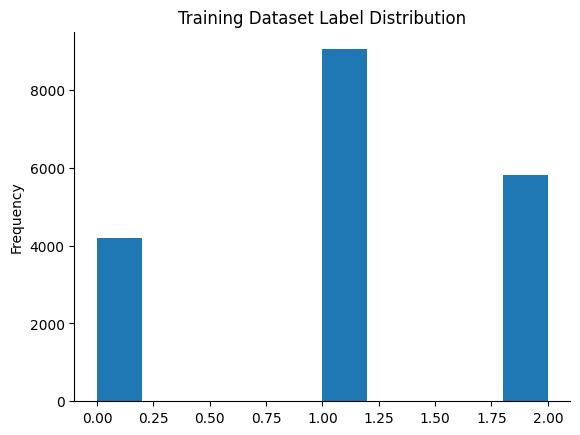

In [ ]:
# @title Plot for Training Dataset

train_dataset.df_preprocessed['label_remapped'].plot(kind='hist', bins=10, title='Training Dataset Label Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

train_dataset.df_preprocessed['label_remapped'].value_counts()

label_remapped
1    2250
2    1437
0    1074
Name: count, dtype: int64

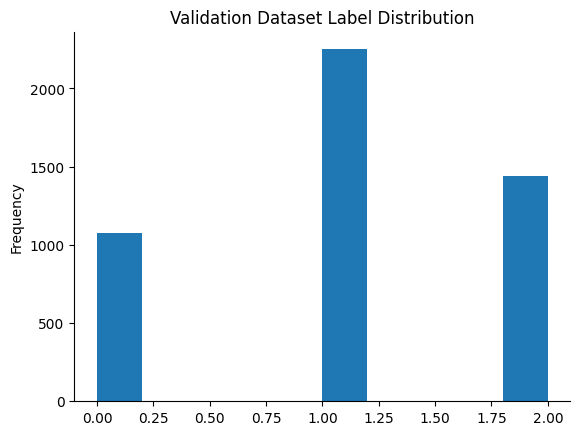

In [ ]:
# @title Plot for Validation Dataset

val_dataset.df_preprocessed['label_remapped'].plot(kind='hist', bins=10, title='Validation Dataset Label Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

val_dataset.df_preprocessed['label_remapped'].value_counts()

label_remapped
1    2953
2    1859
0    1374
Name: count, dtype: int64

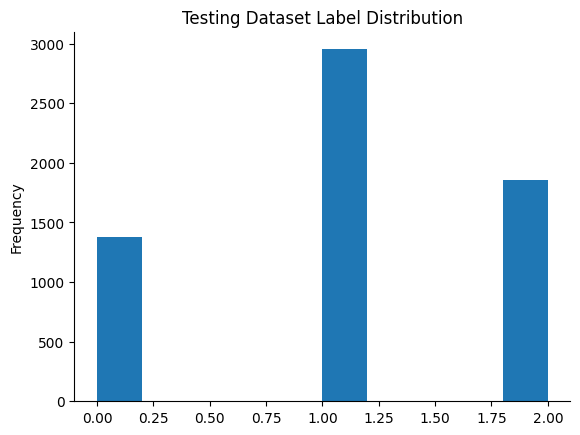

In [ ]:
# @title Plot for Testing Dataset

test_dataset.df_preprocessed['label_remapped'].plot(kind='hist', bins=10, title='Testing Dataset Label Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

test_dataset.df_preprocessed['label_remapped'].value_counts()

In [ ]:
tokens, labels = train_dataset_arousal.dataset.tensors
num_samples, num_features = tokens.shape
config.input_size = num_features
print(f"Totfal number of samples: {num_samples} | Total number of features: {num_features}")

Totfal number of samples: 24000 | Total number of features: 17793


### Pytorch Dataloaders

In [ ]:

train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False)

# train_loader = DataLoader(train_dataset_arousal, batch_size=config.batch_size, shuffle=True)

## split the training data into training and validation
# train_size = int(0.8 * len(train_dataset_arousal))
# val_size = len(train_dataset_arousal) - train_size

# # Note that both train_dataset and val_dataset still refer to the CountVectorizerDataset and share the DataFrames
# train_dataset, val_dataset = random_split(train_dataset_arousal, [train_size, val_size])
# num_samples = len(train_dataset)
# num_samples_val = len(val_dataset)
# print(f"Number of samples in training: {num_samples} | Number of samples in validation: {num_samples_val} ")

# train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)

# val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=True)

# next(iter(train_loader)) # train_loader, val_loader
for X, y in train_loader:
    print("Shape of X : ", X.shape)
    print(f"{len(train_dataset.vectorizer.get_feature_names_out())} train features")
    print(f"{len(test_dataset.vectorizer.get_feature_names_out())} test features")
    break

Shape of X :  torch.Size([128, 17793])
17793 train features
17793 test features


## Logistic Regression Model Architecture with BoW

In [ ]:
# @title Define a simple logistic regression model

class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes=3, optimizer=None, criterion=nn.CrossEntropyLoss(), scheduler=None):
        super(LogisticRegression, self).__init__()

        # Set anomaly detection mode to True for debugging purposes
        torch.autograd.set_detect_anomaly(True)

        self.linear = nn.Linear(input_size, num_classes)

        self.optimizer = torch.optim.Adam(self.parameters(), lr=config.learning_rate) if optimizer is None else optimizer
        self.criterion = criterion
        # self.lr_scheduler = lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='min', factor=0.01, patience=2, min_lr=1e-15) if scheduler is None else scheduler
        self.lr_scheduler = scheduler

        # Move to device -> inplace operation
        self.to(config.device)

    def forward(self, x):

        # nn.CrossEntropyLoss expects raw logits, not softmax probabilities
        # return F.softmax(input=self.linear(x), dim=-1)

        return self.linear(x)

    def training_step(self, train_loader=train_loader):
        # Train the model
        self.train()

        Loss = 0
        Accuracy = 0

        for inputs, labels in train_loader:

            # Move to device -> not inplace operation
            inputs = inputs.to(config.device)
            labels = labels.to(config.device)

            outputs = self(inputs)

            loss = self.criterion(outputs.squeeze(), labels)
            Loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            accuracy = torch.sum(preds == labels) / len(labels)
            Accuracy += accuracy.item()

            # Backprop
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        Loss /= len(train_loader)
        Accuracy /= len(train_loader)

        return Loss, Accuracy

    # https://discuss.pytorch.org/t/pytorch-torch-no-grad-vs-torch-inference-mode/134099
    @torch.inference_mode() # Better than torch.no_grad() bec no version and bump tracking
    def validation_step(self, val_loader=val_loader):
        # Validate the model
        self.eval()

        # Stats for confusion maatrix calculation
        Labels_Preds = {'labels': [], 'preds': []}

        Loss = 0
        Accuracy = 0

        for inputs, labels in val_loader:

            # Move to device -> not inplace operation
            inputs = inputs.to(config.device)
            labels = labels.to(config.device)

            outputs = self(inputs)

            loss = self.criterion(outputs.squeeze(), labels)
            Loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            accuracy = torch.sum(preds == labels) / len(labels)
            Accuracy += accuracy.item()

            Labels_Preds['labels'] += labels.tolist()
            Labels_Preds['preds'] += preds.tolist()

        Loss /= len(val_loader)
        Accuracy /= len(val_loader)

        # print(f"Validation Loss: {Loss} | Validation Accuracy: {Accuracy}")

        return Loss, Accuracy, Labels_Preds

    def train_loop(self,
                   train_loader=train_loader,
                   eval_loader=val_loader,
                   num_epochs=10,
                   patience=10,
                   epsilon_increment=0.001,
                   use_pretrain=False,
                   enable_extras: bool = False
                   ):

        # Statistics variables for plotting
        Losses = {'train': [], 'val': []}
        Accs = {'train': [], 'val': []}
        Labels_Preds = {'labels': [], 'preds': []}
        epoch = 0

        # global best_metric
        best_metric = 0 #float('inf')

        # Initialize a variable to keep track of the number of epochs since the best value was seen
        epochs_since_improvement = 0

        checkpoint_path = f"{file_paths.working_folder}/checkpoint.pth"
        statistics_path = f"{file_paths.working_folder}/statistics.pth"
        if use_pretrain and os.path.exists(checkpoint_path) and os.path.exists(statistics_path):
            checkpoint = torch.load(checkpoint_path)
            self.load_state_dict(checkpoint['state_dict'])
            self.optimizer.load_state_dict(checkpoint['optimizer'])

            Losses, Accs, Labels_Preds = torch.load(statistics_path)

            epoch       = len(Losses['train'])
            best_metric = max( Accs['val'] )

            print(f"Model loaded | Epoch: {epoch} | best_metric: {best_metric*100}%")

        # Loop over the entire dataset for num epochs
        for epoch in range(epoch, num_epochs, 1):

            train_loss, train_acc = self.training_step(train_loader) # Training step
            val_loss, val_acc, labels_preds = self.validation_step(eval_loader) # Validation step

            Labels_Preds['labels'] += labels_preds['labels']
            Labels_Preds['preds'] += labels_preds['preds']

            Losses['train'].append(train_loss)
            Accs['train'].append(train_acc)

            Losses['val'].append(val_loss)
            Accs['val'].append(val_acc)

            print(f"\n{'--'*40} \nEpoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Train Acc: {train_acc*100}% | Val Loss: {val_loss:.6f} | Val Acc: {val_acc*100}%")

            # Extras
            ###############################################################################
            if enable_extras:

                # If the monitored metric has improved, save the current model weights as
                # the best and update the best value of the metric seen so far
                epochs_since_improvement += 1

                # lr scheduler step
                if self.lr_scheduler is not None:
                    self.scheduler.step(val_loss)

                #if val_loss < best_metric:
                if val_acc > best_metric:

                    # This would make sure to terminate early if there's no or only negligible increment in accuracy
                    # That's, set it to 0 if there's non trivial increment in accuracy, e.g., acc < 0.5% is trivial.
                    #if val_loss + epsilon_increment < best_metric:
                    if (val_acc - best_metric)*100 > epsilon_increment:
                        epochs_since_improvement = 0

                    best_metric = val_acc

                    checkpoint = {'state_dict': self.state_dict(),
                                  'optimizer' : self.optimizer.state_dict()
                                }
                    torch.save(checkpoint, checkpoint_path)
                    print(f"Model saved | Epoch: {epoch} | best_metric: {best_metric*100}%")

                metrices = (Losses, Accs)
                torch.save(metrices, statistics_path)

                # Print progress
                print(f"Epochs since improvement: {epochs_since_improvement}, remaining='patience'-'epochs_since_improvement': {patience - epochs_since_improvement}")

                # If the model's 'monitored metrics' has not been improved for more than 'patience' times, then break...
                if epochs_since_improvement >= patience:
                    print(f"""\n{'@'*40}\nepochs_since_improvement ({epochs_since_improvement}) >= patience ({patience}): {epochs_since_improvement >= patience}
                          \nThe model's monitored metrics ('best_metric': {best_metric}) has not been improved for more than 'patience' ({patience}) times. So,terminating...
                          \n{'@'*40}\n""")
                    break

        return Losses, Accs, Labels_Preds

    @torch.inference_mode()
    def predict(self, texts: Union[pd.DataFrame, list[str]]):
        """Predict the class of the given text.

        Args:
            texts (Union[pd.DataFrame, list[str]]): The text to be classified.

        Returns:
            list: The predicted class of the text.
        """

        if type(texts) != pd.core.frame.DataFrame:
            texts = pd.DataFrame(texts, columns=['text'])

        self.eval()

        # preprocess the data to the correct format.
        inputs = preprocess_data(texts, config)
        logger.debug(f"\nAfter preprocessing: {inputs}\n")

        # Vectorize the data
        inputs = test_dataset.vectorizer.transform(inputs['tokens']).toarray()
        inputs = torch.tensor(inputs, dtype=torch.float).to(config.device)
        logger.debug(f"\nAfter vectorization: {inputs.shape=}\n")

        logits = self(inputs.unsqueeze(0))
        outputs_softmax = F.softmax(input=logits, dim=-1).squeeze()
        outputs = torch.argmax(outputs_softmax, dim=-1).cpu().detach().numpy()
        return outputs_softmax, outputs

    def num_parameters(self) -> int:
        """Returns the number of trainable parameters in the model."""
        return sum([p.numel() for p in self.parameters()])

# Initialize the model, loss function, and optimizer
# criterion = nn.CrossEntropyLoss()
# model_lr = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=criterion)



In [ ]:
# %%writefile -a ./main.py

# @title Optimizers, Learning Rate Schedulers

# Initialize the model, loss function, and optimizer
# criterion = nn.CrossEntropyLoss()
# model_lr = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=criterion)


# config.learning_rate = 3e-4
# optimizer = torch.optim.Adam(model_lr.parameters(), lr=config.learning_rate)
# optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=config.learning_rate)
# optimizer = optim.RMSprop(model.parameters(), lr=config.learning_rate)
# model_lr.optimizer = optimizer


# Learning Rate Scheduler
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-15)

# # This scheduler decreases the learning rate exponentially by a factor (gamma) every epoch.
# scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.1) # decay factor = gamma after each epoch

# # T_max: maximum number of epochs for the cosine annealing schedule, and eta_min:minimum learning rate value.
# scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-15, verbose=True)

# scheduler = lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1, step_size_up=2000, cycle_momentum=False)
# scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=1e-1, epochs=100, steps_per_epoch=len(train_loader))

# model_lr.scheduler = scheduler


# Train the model
# Check if the 'epochs' attribute has been initialized
# start_epoch = model_lr.epochs if hasattr(model_lr, 'epochs') else 0
# config.epochs = 50
# Losses, Accs, Labels_Preds = model_lr.train_loop(train_loader=train_loader, eval_loader=val_loader,
#                                    num_epochs=config.epochs, patience=20, epsilon_increment=0.01,
#                                    use_pretrain=False, enable_extras=False
#                                    )


# model_lr.load_state_dict(torch.load(f"{file_paths.working_folder}/checkpoint.pth")['state_dict'])
# loss, acc, Labels_Preds_test = model_lr.validation_step(test_loader)
# print(f'Loss: {loss}, Accuracy: {acc}')

In [ ]:
# @title Grid Search 1

import itertools

class GridSearch:
      def __init__(self
                  #  model: Optional[nn.Module]=None,
                  #  param_grid: Optional[Dict] = None
                   ):

          # Better to define the model in the fit() method so that for every GridSearch param, it starts from scratch.
          # self.model = model
          # if self.model is None:
          #     self.model = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=nn.CrossEntropyLoss())
          # else:
          #     # Check if model is an instance of nn.Module
          #     assert isinstance(self.model, nn.Module), "model must be an instance of nn.Module"

          # # Define a parameter grid
          # # A total of 3*5=15 combinations will be tested.
          # self.param_grid = {
          #     'optimizer': [torch.optim.Adam(self.model.parameters(), lr=config.learning_rate),
          #                   torch.optim.AdamW(self.model.parameters(), lr=config.learning_rate),
          #                   torch.optim.SGD(self.model.parameters(), lr=config.learning_rate, momentum=0.9)
          #                   ],
          #     'lr_sched': [Noone, 'ReduceLROnPlateau', 'ExponentialLR', 'CosineAnnealingLR', 'CyclicLR', 'OneCycleLR'],
          # }

          # self.param_grid = self.param_grid if param_grid is None else param_grid

          self.best_params = None
          self.best_accuracy = 0
          self.best_model = None

          # Start thesse here so that even if you terminate early, you'll still have access to them.
          self.Best_Losses, self.Best_Accs, self.Best_Labels_Preds = None, None, None

      def fit(self,
              model: Optional[nn.Module]=None,
              param_grid: Optional[Dict] = None,
              train_loader: torch.utils.data.DataLoader = train_loader,
              val_loader: torch.utils.data.DataLoader = val_loader,
              num_epochs: int=config.epochs,
              patience: int=config.patience,
              use_pretrain: bool=False,
              enable_extras: bool = True
              ) -> nn.Module:

          # Define a parameter grid
          # A total of 3*5=15 combinations will be tested.
          if param_grid is None:
              param_grid = {
                  'optimizer': [#torch.optim.Adam(model.parameters(), lr=config.learning_rate),
                                torch.optim.AdamW,
                                #torch.optim.SGD(model.parameters(), lr=config.learning_rate, momentum=0.9)
                                ],
                  'lr_sched': ['ReduceLROnPlateau']# , None , 'ExponentialLR', 'CosineAnnealingLR', 'CyclicLR', 'OneCycleLR'],
              }

          # Perform grid search manually
          for optimizer, lr_sched in itertools.product(param_grid['optimizer'], param_grid['lr_sched']):

              # TODO: handle this better
              # if model is None:
              #     model = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=nn.CrossEntropyLoss())
              # else:
              #     # Check if model is an instance of nn.Module
              #     assert isinstance(model, nn.Module), "model must be an instance of nn.Module"
              model = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=nn.CrossEntropyLoss())

              optimizer = optimizer(model.parameters(), lr=config.learning_rate)

              # Lr schedulers
              if lr_sched == 'ReduceLROnPlateau':
                  scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-15)
              elif lr_sched == 'ExponentialLR':
                  # This scheduler decreases the learning rate exponentially by a factor (gamma) every epoch.
                  scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.1) # decay factor = gamma after each epoch
              elif lr_sched == 'CosineAnnealingLR':
                  # T_max: maximum number of epochs for the cosine annealing schedule, and eta_min:minimum learning rate value.
                  scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-15, verbose=True)
              elif lr_sched == 'CyclicLR':
                  scheduler = lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1, step_size_up=2000, cycle_momentum=False)
              elif lr_sched == 'OneCycleLR':
                  scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=1e-1, epochs=100, steps_per_epoch=len(train_loader))
              else:
                  # Raise ValueError(f"lr_sched must be one of ['ReduceLROnPlateau', 'ExponentialLR', 'CosineAnnealingLR', 'CyclicLR', 'OneCycleLR']")
                  scheduler = None

              # Modify the model with the current parameters
              model.optimizer = optimizer
              model.scheduler = scheduler

              print(f"\n{'#'*80} \nStarting training | optimizer: {optimizer.__class__.__name__} | lr_scheduler: {lr_sched}")

              # Train the model
              Losses, Accs, Labels_Preds = model.train_loop(train_loader=train_loader, eval_loader=val_loader,
                                                  num_epochs=num_epochs, patience=patience, epsilon_increment=0.01,
                                                  use_pretrain=use_pretrain, enable_extras=enable_extras
                                                  )

              # Get validation accuracy
              val_accuracy = torch.max(torch.tensor(Accs['val']) ).item()
              # Weighted average of accuracy and loss
              # weighted_best = 0.2*loss + acc*0.8

              # Check if current model is the best so far
              if val_accuracy > self.best_accuracy:
                  self.best_accuracy = val_accuracy
                  self.best_params = {'optimizer': optimizer, 'lr_sched': lr_sched}
                  self.best_model = model
                  self.Best_Losses = Losses
                  self.Best_Accs = Accs
                  self.Best_Labels_Preds = Labels_Preds

                  print(f"\n{'@'*100}\nBest Model | val_acc: {val_accuracy*100}% | optimizer: {optimizer.__class__.__name__} | lr_sched: {lr_sched}\n{'@'*100}\n")

          print(f"\n{'#'*80}")
          print(f"Final Best Parameters: Optimizer: {self.best_params['optimizer'].__class__.__name__}, Learning Rate Scheduler: {self.best_params['lr_sched']}")
          print("Final Best Validation Accuracy:", self.best_accuracy)

          return self.Best_Losses, self.Best_Accs, self.Best_Labels_Preds

      def predict(self,
                  model: Optional[nn.Module]=None,
                  test_loader: torch.utils.data.DataLoader = test_loader):

          if model is None:
              # self.best_model.load_state_dict(torch.load(f"{file_paths.working_folder}/checkpoint.pth")['state_dict'])
              loss, acc, Labels_Preds_test = self.best_model.validation_step(test_loader)
          else:
              # model.eval() # Already set to evaluation mode in the validation_step
              loss, acc, Labels_Preds_test = model.validation_step(test_loader)

          print(f'Loss: {loss}, Accuracy: {acc}')

          return Labels_Preds_test

gs_model_lr = GridSearch()

In [ ]:
# Fit the model using grid search
Best_Losses, Best_Accs, Best_Labels_Preds = gs_model_lr.fit(num_epochs=config.epochs)


################################################################################ 
Starting training | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.098871 | Train Acc: 31.93321640059452% | Val Loss: 1.096951 | Val Acc: 38.2261513095153%
Model saved | Epoch: 0 | best_metric: 38.2261513095153%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 1.093565 | Train Acc: 46.2023761048413% | Val Loss: 1.092787 | Val Acc: 46.9300986904847%
Model saved | Epoch: 1 | best_metric: 46.9300986904847%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 1.088422 | Train Acc: 51.2624144154107% | Val Loss: 1.088776 | V

In [ ]:
# Final Best Parameters: Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.4820477068424225

In [ ]:
Best_Losses = gs_model_lr.Best_Losses
Best_Accs = gs_model_lr.Best_Accs
Best_Labels_Preds = gs_model_lr.Best_Labels_Preds

In [ ]:
# Predict the labels of the test set using the best model
Labels_Preds_test = gs_model_lr.predict(test_loader=test_loader)

# Same as above but explicit
# best_model_lr = gs_model_lr.best_model
# Labels_Preds_test = gs_model_lr.predict(model=best_model_lr, test_loader=test_loader)

# Loss: 1.0465288186559871, Accuracy: 0.48153547121554

Loss: 1.0465288186559871, Accuracy: 0.48153547121554


In [ ]:
# @title Plot the loss and accuracy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def plot_metric(train_metric, eval_metric, train_metric_name, eval_metric_name, plot_name, c1='#4169E1',c2='#DC143C', top_lim=5):
    '''
    train_metric: An array of numbers representing the train metric (e.g., loss or accuracy) for each epoch during the training process.
    eval_metric: An array of numbers representing the validation metric (e.g., loss or accuracy) for each epoch during the training process.
    train_metric_name: A string representing the name of the train metric that will be displayed in the legend of the plot.
    eval_metric_name: A string representing the name of the validation metric that will be displayed in the legend of the plot.
    plot_name: A string representing the title of the plot.
    '''

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(train_metric))

    # Plot the Graph.
    plt.plot(epochs, train_metric, color=c1, label = train_metric_name)
    plt.plot(epochs, eval_metric,  color=c2,  label = eval_metric_name)
    # plt.ylim(bottom=0, top=top_lim)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

def confusion_matrix_score(ytest, ypred, name='Test'):

    class_labels = ['Bassa', 'Media', 'Alta']

    print( f"\n\nAccuracy_score: {accuracy_score(ytest, ypred)}\n" )
    #print( f"\nmodel.score function: {model.score(Xtest, ytest)}", end= "\n\n" )

    mat = confusion_matrix(ytest, ypred, normalize='true') # normalize : {'true', 'pred', 'all'}, default=None
    # mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis] # same as normalize='true'

    # Change fmt to 'd' for integer, fmt='.2f' for float
    sns.heatmap(mat, square=True, annot=True, fmt='.2f', cbar=False,
                xticklabels=class_labels,
                yticklabels=class_labels)

    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels');
    plt.title(name + 'Classification Report')
    # plt.show(block=False)

    # classification_report
    print(f"\nclassification_report: \n{ classification_report(ytest, ypred, target_names=config.choice_mapping.keys()) }\n\n")

# Define color codes
color1 = '#4169E1'   # Royal Blue
color2 = '#DC143C'   # Crimson
color3 = '#32CD32'   # Lime Green
color4 = '#DAA520'   # Goldenrod
color5 = '#FF1493'   # Deep Pink
color6 = '#FF8C00'   # Dark Orange
color7 = '#1E90FF'   # Dodger Blue
color8 = '#9932CC'   # Dark Orchid


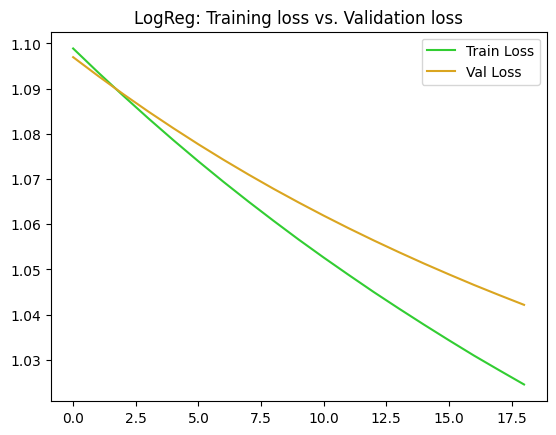

In [ ]:
n = "LogReg: Training loss vs. Validation loss"
#plot_metric(train_metric=train_loss_history_r3d, eval_metric=val_loss_history_r3d, train_metric_name="R3D train", eval_metric_name="R3D val", plot_name=n, c1=color1, c2=color2)
plot_metric(train_metric=Best_Losses['train'], eval_metric=Best_Losses['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



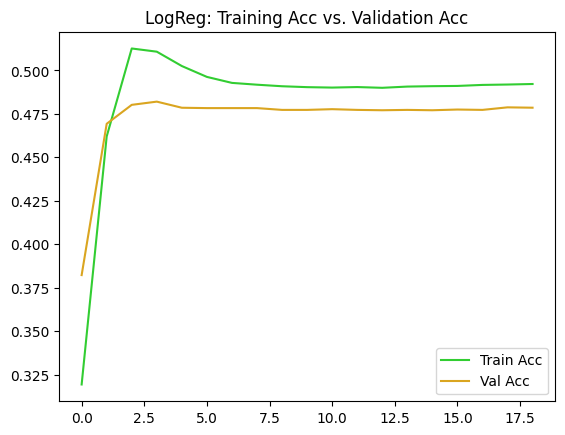

In [ ]:

n = "LogReg: Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs['train'], eval_metric=Best_Accs['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)




Accuracy_score: 0.4714953735946672


classification_report: 
              precision    recall  f1-score   support

        Alta       0.28      0.01      0.03     20406
       Media       0.48      0.95      0.63     42750
       Bassa       0.43      0.07      0.12     27303

    accuracy                           0.47     90459
   macro avg       0.40      0.34      0.26     90459
weighted avg       0.42      0.47      0.34     90459





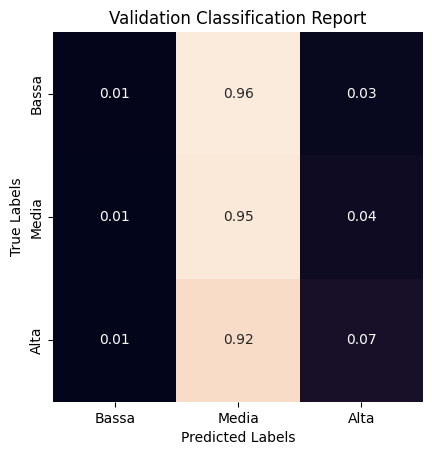

In [ ]:
# Confusion Matrix for the best model on the validation set
confusion_matrix_score(ytest=Best_Labels_Preds['labels'], ypred=Best_Labels_Preds['preds'], name='Validation ')



Accuracy_score: 0.4799547365017782


classification_report: 
              precision    recall  f1-score   support

        Alta       1.00      0.00      0.00      1374
       Media       0.48      1.00      0.65      2953
       Bassa       0.64      0.02      0.03      1859

    accuracy                           0.48      6186
   macro avg       0.71      0.34      0.23      6186
weighted avg       0.64      0.48      0.32      6186





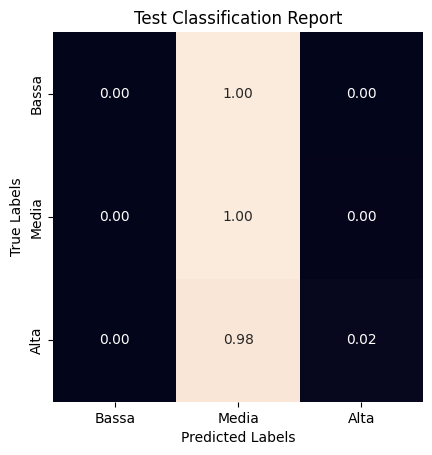

In [ ]:
# Confusion Matrix for the best model on the test set
confusion_matrix_score(ytest=Labels_Preds_test['labels'], ypred=Labels_Preds_test['preds'], name='Test ')


We saw that the training statistics keep improving at every epoch. Is the model overfitting? Is it underfitting? Those it have enough capacity to learn? Does it have enough data to learn? Let's see!

### Prediction with the trained model

Let's use the trained model to make predictions on some new data.

In [ ]:
logger.setLevel(logging.ERROR)

random.seed(seed)
idxs = [random.randint(0, len(test_dataset.dataframe)) for _ in range(12)]

texts = test_dataset.dataframe['text'].iloc[idxs]
labels = test_dataset.dataframe['label'].iloc[idxs]
# print(f"Texts: {texts}\nLabels: {labels}\n")

text_df = pd.DataFrame(texts, columns=['text'])

outputs_softmax, outputs = gs_model_lr.best_model.predict(text_df)
print(f"\n(Correct labels, Predicted outputs, Correct labels == Predicted labels): \n\t{ list(zip(labels, outputs, list(labels == outputs)))} \n\noutputs_softmax: \n {outputs_softmax}")



(Correct labels, Predicted outputs, Correct labels == Predicted labels): 
	[(2, 1, False), (2, 1, False), (2, 1, False), (2, 1, False), (0, 1, False), (2, 1, False), (2, 1, False), (1, 1, True), (1, 1, True), (2, 1, False), (1, 1, True), (0, 1, False)] 

outputs_softmax: 
 tensor([[0.3034, 0.3898, 0.3069],
        [0.2448, 0.4009, 0.3543],
        [0.2771, 0.3801, 0.3428],
        [0.2852, 0.4158, 0.2990],
        [0.2782, 0.4009, 0.3209],
        [0.2834, 0.3744, 0.3422],
        [0.2807, 0.3713, 0.3480],
        [0.2862, 0.3745, 0.3393],
        [0.2771, 0.4152, 0.3077],
        [0.2646, 0.3929, 0.3426],
        [0.2964, 0.4035, 0.3001],
        [0.3262, 0.4088, 0.2650]], device='cuda:0')


Always predicts 1, the majority class. One way of mitigating this is to use the weights parameter in the loss function to penalize misclassifications in the minority classes.

## Vocab (Embeddings) Dataset instead of BoW

In [ ]:
# @title Sentence Classification Dataset using Vocab (Embedding) rather than Count Vectorizer (BoW)

class SentenceClassificationDataset(Dataset):
    def __init__(self,
                 file_path: Union[Path, pd.DataFrame]=None,
                 config: Optional[Config]=None,
                 name: Optional[str]=None,
                 add_name_to_text: bool=True,
                 train: Optional[bool]=True,
                 test_vocabulary: Vocab=None, # required for testing
                 tokenizer: Optional[Callable]=None,
                 embedding_type: str='custom',
                 max_vocab_size: int=10_000,
                 modify_collate_fn: bool=False
                 ):

        if name and file_path:
            logger.info(f"Loading {name} dataset from {file_path} for {'Training' if train else 'Testing'}")

        self.config = config or Config()
        self.train = train

        self.tokenizer = tokenizer
        self.embedding_type = embedding_type
        self.max_vocab_size = max_vocab_size

        # If true, it modifies this method to be compatible with the LSTM pack_sequence method
        self.modify_collate_fn = modify_collate_fn

        # TODO: Concat name

        # The 'None's allow to initialize the dataset without a file path ...
        if file_path is None:
            self.dataframe = None
            self.df_preprocessed = None
            self.vocabulary = None
        else:
            # {'tokens': ['I', 'like', 'this', 'movie'], 'label': 1, 'choices': ['Alta', 'Media', 'Bassa'], 'dimension': 'arousal'}
            if type(file_path) == pd.core.frame.DataFrame:
                self.dataframe = file_path # The original dataset in pandas format
            else:
                if not add_name_to_text:
                    name = ''
                else:
                    name = name + ': '
                self.dataframe = pd.DataFrame( self.load_data(file_path, name) )

            self.dataframe['label_remapped'] = self.dataframe.apply(self.label_to_choice, axis=1)

            # {'text': 'I like this movie', 'tokens': ['I', 'like', 'this', 'movie'], 'input_ids': [1, 2, 3, 4], 'label': 1, 'choices': [0, 1, 2]}
            self.df_preprocessed = self.preprocess_data(self.dataframe) # The preprocessed dataset

            if train:
                self.vocabulary = self.build_vocab(self.config)
            else:
                assert test_vocabulary is not None, "Vocabulary not provided for testing"
                self.vocabulary = test_vocabulary

    def load_data(self, file_path: Path, name: str) -> list[dict]:
        data = []
        with open(file_path, "r") as f:
            for line in f:
                sample = json.loads(line.strip())
                data.append({
                    'text': f'{name}' + sample["text"],
                    'label': sample["label"],
                    'choices': sample["choices"],
                    'dimension': sample["dimension"]
                })
        return data

    # Define preprocessing functions
    def preprocess_data(self, df: pd.DataFrame):

        # Replace all punctuation with space. "un'organizzazione che ci tiene, , si" -> "un organizzazione che ci tiene    si"
        df['tokens'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x)) # Remove punctuation
        logger.debug(f"Remove punctuation: \n{df['tokens'][:2]}\n")

        # split
        df['tokens'] = df['tokens'].apply(lambda x: x.lower().split())

        stop_words = set(nlp_spacy.Defaults.stop_words)
        # tokens = [w for w_list in df['tokens'] for w in w_list if w not in stop_words]  # Remove stopwords
        df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
        logger.debug(f"Remove stopwords: \n{df['tokens'][:2]}\n")

        # Note: Lemmatization requires a large amount of time and memory.
        # Lemmatization vs Stemming: https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming
        if self.config.lemmatization:
            def lemmatized(tokens):
                tokens = ' '.join(tokens)
                tokens = nlp_spacy(tokens)
                return [token.lemma_ for token in tokens]

            # 'Mi piace, e tu?' -> ['mi', 'piacere', 'e', 'tu', '?']
            df['tokens'] = df['tokens'].apply(lambda tokens: lemmatized(tokens))
            # df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
            logger.debug(f"Lemmatization: \n{df['tokens'][:2]}\n")

        # tokenize the list of words. Do this after the lemmatization step
        if self.tokenizer is not None:
            df['tokens'] = df['tokens'].apply(lambda x: self.tokenizer(' '.join(x)))
            logger.debug(f"Tokenize: \n{df['tokens'][:2]}\n")

        # Don't join the tokens
        # df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

        return df

    def __len__(self):
        return self.df_preprocessed.shape[0]

    def __getitem__(self, idx):

        # return self.dataset[idx]
        # {'input_ids': [1, 2, 3, 4], 'tokens': ['I', 'like', 'this', 'movie'], 'label': 1, 'choices': [2,0,1]}
        sample = self.df_preprocessed.iloc[idx]
        input_ids = self.vocabulary(sample['tokens'])
        # logger.debug(f"tokens -> input_ids: \n{sample['tokens']} -> {input_ids}")

        # DOn't apply the tensors here since the tokens can have different lens. We'll pad them later in the collate_fn.
        # input_ids = torch.tensor(input_ids, dtype=torch.int64)  # Shape: (seq_len)
        # labels = torch.tensor(sample['label_remapped'], dtype=torch.int64)

        labels = sample['label_remapped']
        return input_ids, labels

    def add(self, other):

        self.dataframe = pd.concat([self.dataframe, other.dataframe], ignore_index=True)
        # Remove duplicates from the dataframe if you run this more than once with the same 2 objects.
        # self.dataframe.drop_duplicates(subset=['text', 'dimension', 'label_remapped'], inplace=True)

        self.df_preprocessed = pd.concat([self.df_preprocessed, other.df_preprocessed], ignore_index=True)

        if self.train:
            # The the new vocabulary with the new data
            self.vocabulary = self.build_vocab(self.config)
        # else:
        #     self.test_vocabulary = self.test_vocabulary

    def split(self, ratio: float=0.2):
        """Split the dataset into training and validation sets"""
        if self.dataframe is None:
            raise ValueError("Dataset is not loaded becuase you didn't provide a file path.")

        # Shuffle and split the indices randomly and use them to split the dataframes
        len_df = self.dataframe.shape[0]
        indices = np.arange(len_df)
        # Stratified split
        train_indices, val_indices = train_test_split(indices, test_size=ratio, shuffle=True, stratify=self.df_preprocessed['label_remapped'])

        # Use the indices to split all the dataframes
        train_df = self.dataframe.iloc[train_indices]
        val_df = self.dataframe.iloc[val_indices]

        train_df_preprocessed = self.df_preprocessed.iloc[train_indices]
        val_df_preprocessed = self.df_preprocessed.iloc[val_indices]

        train_class = SentenceClassificationDataset(train=True)
        train_class.dataframe = train_df
        train_class.df_preprocessed = train_df_preprocessed
        train_class.vocabulary = self.build_vocab(self.config)

        val_class = SentenceClassificationDataset(train=False)
        val_class.dataframe = val_df
        val_class.df_preprocessed = val_df_preprocessed
        val_class.vocabulary = train_class.vocabulary

        if self.modify_collate_fn:
            train_class.modify_collate_fn = self.modify_collate_fn
            val_class.modify_collate_fn = self.modify_collate_fn

        return train_class, val_class

    def build_vocab(self, config: Config) -> Vocab:
        """ Builds a `torchtext.vocab.Vocab` object from data stored in this object."""
        if self.embedding_type == 'pretrained':
            vocabulary = Vocab(GloVe(name='6B', dim=300))
        else:
            # most_common() returns a list of (token, count) pairs, so we convert them back into dictionary
            vocab_counter = Counter(token for tokens in self.df_preprocessed['tokens'] for token in tokens).most_common()
            sorted_by_freq_tuples = sorted(vocab_counter, key=lambda x: x[1], reverse=True)
            ordered_dict = OrderedDict(sorted_by_freq_tuples)
            # We build the vocabulary through a dictionary like {token: frequency, ...}
            vocabulary = vocab(ordered_dict, min_freq=1, specials=[config.pad_token, config.unk_token, *config.extra_tokens], special_first=True)

        # vocabulary(list of tokens) returns a list of values, so get the unk idx
        unk_idx = vocabulary([config.unk_token])[0]
        # Set the default index to the unk idx so that we can use it for out-of-vocabulary (OOV) words
        vocabulary.set_default_index(unk_idx)

        # Get the indices of the tokens in the vocabulary
        # self.df_preprocessed['input_ids'] = self.df_preprocessed['tokens'].apply(lambda tokens: vocabulary(tokens))

        return vocabulary

    # Labels Remap
    def label_to_choice(self, row):
        label = row['label']
        choices = row['choices']
        return self.config.choice_mapping[choices[label]]

    def collate_batch(self, batch):
        """ Collate a batch of data. This function is used for the `DataLoader` object.

        Args:
            batch (List[int], List[int]): A batch of data in the format of (input_ids, labels).

        Returns:
            Tuple[Tensor[int], List[int], Tensor[int]]: A batch of data in the format of (input_ids, lengths, labels).
        """
        # logger.debug(f"\nBatch in collate: {batch}")

        # Since the len of the input_ids are not all the same, but the tensore requires same len or dtype, ...
        # ... we convert only the inner lists to tensors bec the pad_sequence function requires tensor or List(tensor).
        input_ids_ = [torch.tensor(input_id, dtype=torch.int64) for input_id, _ in batch if len(input_id) > 0]  # Shape: (batch_size, max_seq_len)
        labels = torch.tensor([label for input_id, label in batch if len(input_id) > 0], dtype=torch.long) # Shape: (batch_size)

        input_ids = pad_sequence(input_ids_, batch_first=True, padding_value=self.vocabulary[config.pad_token])  # Shape: (batch_size, max_seq_len)

        if self.modify_collate_fn:
            lengths = torch.tensor([len(input_id) for input_id in input_ids_])  # Shape: (batch_size)

            # Check if any of the lens is <= 0
            if torch.any(lengths <= 0):
                print("\n\nAlert in collate_fn: Some of the lengths in the batch are <= 0.\n\n")

            # return {'input_ids': input_ids, 'lengths': lengths, 'labels': labels}
            return input_ids, lengths, labels

        return input_ids, labels

    @staticmethod
    def get_dataloader(dataset: Dataset,
                        batch_size: int=config.batch_size,
                        random_state: int=seed,
                        shuffle: bool=True
                        ) -> Union[Tuple[DataLoader, DataLoader], DataLoader]:
        """
        Get the data loaders for training and validation sets or test set.

        Args:
            dataset (Dataset): The dataset for training, validation, or for test.
            batch_size (int): The batch size.
            random_state (int): The random state for the data split.

        Returns:
            # if len(datasets) == 2:
            tuple[torch.utils.data.DataLoader, torch.utils.data.DataLoader]: The training and validation data loaders.
            # else:
            torch.utils.data.DataLoader: The test data loader.
        """
        return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=dataset.collate_batch)




In [ ]:
# @title Preprocess and build the datasets for training and validation

train_vocab_arousal = SentenceClassificationDataset(file_path=file_paths.train_path_arousal,
                                                      config=config,
                                                      name='Arousal',
                                                      train=True,
                                                      test_vocabulary=None, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000)

train_vocab_dominance = SentenceClassificationDataset(file_path=file_paths.train_path_dominance,
                                                      config=config,
                                                      name='Dominance',
                                                      train=True,
                                                      test_vocabulary=None, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000)

train_vocab_valence = SentenceClassificationDataset(file_path=file_paths.train_path_valence,
                                                      config=config,
                                                      name='Valence',
                                                      train=True,
                                                      test_vocabulary=None, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000)



In [ ]:
# @title Combine the training datasets into one

train_vocab_arousal.add(train_vocab_dominance)
train_vocab_arousal.add(train_vocab_valence)

train_vocab_arousal.df_preprocessed.head(3)
# train_vocab_arousal[0]

,text,label,choices,dimension,label_remapped,tokens
0,Arousal: Auguriamo a voi e alla vostra famigli...,2,"[Media, Alta, Bassa]",Arousal,0,"[arousal, auguriamo, famiglia, gioia, amore]"
1,Arousal: Ha anche respinto le notizie secondo ...,2,"[Media, Alta, Bassa]",Arousal,0,"[arousal, respinto, notizie, dimissioni, deriv..."
2,Arousal: 27 aprile 2009 12:07 Padraic Ryan: Og...,2,"[Media, Bassa, Alta]",Arousal,2,"[arousal, 27, aprile, 2009, 12, 07, padraic, r..."


In [ ]:
# Let's check the sizes
num_samples, num_features = train_vocab_arousal.df_preprocessed.shape
print(f"The DataFrame has {num_samples} samples and {num_features} features.")


The DataFrame has 24000 samples and 6 features.


In [ ]:
# @title Split the Training datasets into training and validation sets

train_vocab, val_vocab = train_vocab_arousal.split(ratio=0.2)
print(f"Train: {len(train_vocab)}, Validation: {len(val_vocab)}")

Train: 19200, Validation: 4800


In [ ]:
# @title Do the same things with the test dataset

test_vocab = SentenceClassificationDataset(file_path=file_paths.test_path_arousal,
                                                      config=config,
                                                      name='Arousal',
                                                      train=False,
                                                      test_vocabulary=train_vocab.vocabulary, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000)

test_vocab_dominance = SentenceClassificationDataset(file_path=file_paths.test_path_dominance,
                                                      config=config,
                                                      name='Dominance',
                                                      train=False,
                                                      test_vocabulary=train_vocab.vocabulary, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000)

test_vocab_valence = SentenceClassificationDataset(file_path=file_paths.test_path_valence,
                                                      config=config,
                                                      name='Valence',
                                                      train=False,
                                                      test_vocabulary=train_vocab.vocabulary, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000)

test_vocab.add(test_vocab_dominance)
test_vocab.add(test_vocab_valence)

# set the test vocabulary to the trianing vocabulary
test_vocab.vocabulary = train_vocab.vocabulary

# Let's check the sizes
num_samples, num_features = test_vocab.df_preprocessed.shape
print(f"The DataFrame for testing has {num_samples} samples and {num_features} features.")

test_vocab[0]
# next(iter(test_vocab))
for idx, (input_ids, labels) in enumerate(test_vocab):
    print(f"input_ids: {input_ids}, labels: {labels}")
    if idx == 2: break


The DataFrame for testing has 6186 samples and 6 features.
input_ids: [2, 60, 77, 31, 1, 8549, 1, 7721, 1, 15834], labels: 1
input_ids: [2, 832, 2276, 7178, 1, 1, 4574], labels: 2
input_ids: [2, 5192, 1, 1, 5, 2943, 1, 6, 1], labels: 1


In [ ]:
# @title Create the dataloaders

train_vocab_dataloader = train_vocab.get_dataloader(dataset=train_vocab, batch_size=config.batch_size, random_state=seed)
val_vocab_dataloader = val_vocab.get_dataloader(dataset=val_vocab, batch_size=config.batch_size, random_state=seed, shuffle=False)

test_vocab_dataloader = test_vocab.get_dataloader(dataset=test_vocab, batch_size=config.batch_size, random_state=seed, shuffle=False)

for idx, (input_ids, labels) in enumerate(train_vocab_dataloader):
    print(f"Batch size: {input_ids.shape[0]}, Max seq len for this batch: {input_ids.shape[1]}, \nlabels.shape: {labels}")
    if idx == 0: break

# next(iter(test_vocab_dataloader))

Batch size: 128, Max seq len for this batch: 34, 
labels.shape: tensor([0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2,
        2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2,
        1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1,
        0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0,
        1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1,
        1, 0, 0, 2, 1, 2, 1, 2])


## Logistics Regression Model Architecture with Embeddings

- The first architecture -- seen previously -- uses a bag-of-words representation of the text as input
- The second architecture uses an embedding layer to represent the text

In [ ]:
# %%writefile -a "{file_paths.working_folder}/log_reg_with_emb.py"

# @title Define another logistic regression model that inherits from the previous one by incorporating the Embedding layer.

# Inherit from the LogisticRegression class since it has many similarities with this model.
class LogRegWithEmb(LogisticRegression):
    def __init__(self,
                 num_classes: int=3,
                 optimizer: torch.optim.Optimizer=None,
                 criterion=nn.CrossEntropyLoss(),
                 scheduler=None,
                 vocab_size: int=config.max_sequence_length,
                 embedding_type: Optional[str]='custom',
                 padding_idx: int=0,
                 embedding_dim: int=config.embedding_size):

        # Call the super constructor. It has only one linear layer.
        super().__init__(input_size=embedding_dim, num_classes=num_classes, optimizer=optimizer, criterion=criterion, scheduler=scheduler)

        if embedding_type == 'pretrained':
            embedding_dim = 300
            self.embedding = nn.Embedding.from_pretrained(GloVe(name='6B', dim=embedding_dim).vectors)
        elif embedding_type == 'custom':
            self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                          embedding_dim=embedding_dim,
                                          padding_idx=padding_idx, # avoid updating the gradient of padding entries
                                          dtype=torch.float
                                          )
        else:
            raise ValueError(f"embedding_type: {embedding_type} not supported.")

        # add another linear linear to increase the model capacity
        self.linear2 = nn.Sequential(
            nn.Linear(embedding_dim, embedding_dim),
            nn.BatchNorm1d(num_features=embedding_dim, device=config.device),
            nn.LeakyReLU()
        )

        # Move to device -> inplace operation
        self.to(config.device)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)
        avg_embs = torch.mean(embedded, dim=1)
        avg_embs = avg_embs.float()
        output = self.linear2(avg_embs)
        output = self.linear(output)
        return output


In [ ]:
len(train_vocab.vocabulary)

17828

In [ ]:
# @title Init the model

vocab_size=len(train_vocab.vocabulary)
padding_idx = train_vocab.vocabulary[config.pad_token]

# model_lre = LogRegWithEmb(num_classes=3,
#                           optimizer=None ,
#                           criterion=nn.CrossEntropyLoss(),
#                           scheduler=None,
#                           embedding_type='custom' ,
#                           vocab_size=vocab_size,
#                           embedding_dim=300)

# model_lre.optimizer = optim.Adam(model_lre.parameters(), lr=config.learning_rate)
# model_lre.scheduler = optim.lr_scheduler.ReduceLROnPlateau(model_lre.optimizer, mode='min', factor=0.1, patience=2)

In [ ]:
# @title Grid Search version 2 for the Embbed LogReg

# @title Grid Search 1

class GridSearch2:
      def __init__(self
                  #  model: Optional[nn.Module]=None,
                  #  param_grid: Optional[Dict] = None
                   ):

          # Better to define the model in the fit() method so that for every GridSearch param, it starts from scratch.
          # self.model = model
          # if self.model is None:
          #     self.model = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=nn.CrossEntropyLoss())
          # else:
          #     # Check if model is an instance of nn.Module
          #     assert isinstance(self.model, nn.Module), "model must be an instance of nn.Module"

          # # Define a parameter grid
          # # A total of 3*5=15 combinations will be tested.
          # self.param_grid = {
          #     'optimizer': [torch.optim.Adam(self.model.parameters(), lr=config.learning_rate),
          #                   torch.optim.AdamW(self.model.parameters(), lr=config.learning_rate),
          #                   torch.optim.SGD(self.model.parameters(), lr=config.learning_rate, momentum=0.9)
          #                   ],
          #     'lr_sched': [Noone, 'ReduceLROnPlateau', 'ExponentialLR', 'CosineAnnealingLR', 'CyclicLR', 'OneCycleLR'],
          # }

          # self.param_grid = self.param_grid if param_grid is None else param_grid


          self.best_params = None
          self.best_accuracy = 0
          self.best_model = None
          self.Best_Losses, self.Best_Accs, self.Best_Labels_Preds = None, None, None

      def fit(self,
              model: Optional[nn.Module]=None,
              param_grid: Optional[Dict] = None,
              train_loader: torch.utils.data.DataLoader = train_loader,
              val_loader: torch.utils.data.DataLoader = val_loader,
              num_epochs: int=config.epochs,
              patience: int=config.patience,
              use_pretrain: bool=False,
              enable_extras: bool = True
              ) -> Tuple[Dict, Dict, Dict]:

          # Define a parameter grid
          # A total of 3*4=12 combinations will be tested.
          if param_grid is None:
              emtype = ['custom', 'pretrained'] if config.use_pretrain else ['custom']
              param_grid = {
                  'embed_type': emtype,
                  'optimizer': [#torch.optim.Adam,
                                torch.optim.AdamW,
                                #torch.optim.SGD(model.parameters(), lr=config.learning_rate, momentum=0.9)
                                ],
                  'lr_sched': ['ReduceLROnPlateau'] #, None, 'ExponentialLR', 'CosineAnnealingLR'],
              }

          # Perform grid search manually
          for embed_type, optimizer, lr_sched in itertools.product(param_grid['embed_type'], param_grid['optimizer'], param_grid['lr_sched']):

              # TODO: handle this better
              # Define the model
              # if model is None:
              #     # model = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=nn.CrossEntropyLoss())
              #     model = LogRegWithEmb(num_classes=3,
              #                           optimizer=None ,
              #                           criterion=nn.CrossEntropyLoss(),
              #                           scheduler=None,
              #                           embedding_type=embed_type,
              #                           vocab_size=vocab_size,
              #                           padding_idx=padding_idx,
              #                           embedding_dim=300)
              # else:
              #     # Check if model is an instance of nn.Module
              #     assert isinstance(model, nn.Module), "model must be an instance of nn.Module"
              model = LogRegWithEmb(num_classes=3,
                                        optimizer=None ,
                                        criterion=nn.CrossEntropyLoss(),
                                        scheduler=None,
                                        embedding_type=embed_type,
                                        vocab_size=vocab_size,
                                        padding_idx=padding_idx,
                                        embedding_dim=300)

              optimizer = optimizer(model.parameters(), lr=config.learning_rate)

              # Lr schedulers
              if lr_sched == 'ReduceLROnPlateau':
                  scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-15)
              elif lr_sched == 'ExponentialLR':
                  # This scheduler decreases the learning rate exponentially by a factor (gamma) every epoch.
                  scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.1) # decay factor = gamma after each epoch
              elif lr_sched == 'CosineAnnealingLR':
                  # T_max: maximum number of epochs for the cosine annealing schedule, and eta_min:minimum learning rate value.
                  scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-15, verbose=True)
              elif lr_sched == 'CyclicLR':
                  scheduler = lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1, step_size_up=2000, cycle_momentum=False)
              elif lr_sched == 'OneCycleLR':
                  scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=1e-1, epochs=100, steps_per_epoch=len(train_loader))
              else:
                  # Raise ValueError(f"lr_sched must be one of ['ReduceLROnPlateau', 'ExponentialLR', 'CosineAnnealingLR', 'CyclicLR', 'OneCycleLR']")
                  scheduler = None

              # Modify the model with the current parameters
              model.optimizer = optimizer
              model.scheduler = scheduler

              print(f"\n{'#'*80} \nStarting training | Embed type: {embed_type} | optimizer: {optimizer.__class__.__name__} | lr_scheduler: {lr_sched}")

              # Train the model
              Losses, Accs, Labels_Preds = model.train_loop(train_loader=train_loader,
                                                            eval_loader=val_loader,
                                                            num_epochs=num_epochs,
                                                            patience=patience,
                                                            epsilon_increment=0.01,
                                                            use_pretrain=use_pretrain,
                                                            enable_extras=enable_extras
                                                            )

              # Get validation accuracy
              val_accuracy = torch.max(torch.tensor(Accs['val']) ).item()
              # Weighted average of accuracy and loss
              # weighted_best = 0.2*loss + acc*0.8

              # Check if current model is the best so far
              if val_accuracy > self.best_accuracy:
                  self.best_accuracy = val_accuracy
                  self.best_params = {'optimizer': optimizer, 'lr_sched': lr_sched}
                  self.best_model = model
                  self.Best_Losses = Losses
                  self.Best_Accs = Accs
                  self.Best_Labels_Preds = Labels_Preds

                  print(f"\n{'@'*100}\nBest Model | val_acc: {val_accuracy*100}% | Embed type: {embed_type} | optimizer: {optimizer.__class__.__name__} | lr_sched: {lr_sched}\n{'@'*100}\n")

          print(f"\n{'#'*80}")
          print(f"Final Best Parameters: Embed type: | {embed_type} | Optimizer: {self.best_params['optimizer'].__class__.__name__}, Learning Rate Scheduler: {self.best_params['lr_sched']}")
          print("Final Best Validation Accuracy:", self.best_accuracy)

          return self.Best_Losses, self.Best_Accs, self.Best_Labels_Preds

      def predict(self,
                  model: Optional[nn.Module]=None,
                  test_loader: torch.utils.data.DataLoader = test_loader
                  ) -> Dict:

          if model is None:
              # self.best_model.load_state_dict(torch.load(f"{file_paths.working_folder}/checkpoint.pth")['state_dict'])
              loss, acc, Labels_Preds_test = self.best_model.validation_step(test_loader)
          else:
              # model.eval() # Already set to evaluation mode in the validation_step
              loss, acc, Labels_Preds_test = model.validation_step(test_loader)

          print(f'Loss: {loss}, Accuracy: {acc}')

          return Labels_Preds_test

# lrv = Logistics Regression with Vocab
gs_model_lrv = GridSearch2()

In [ ]:
# @title Train the model

# Losses, Accs, Labels_preds = model_lre.train_loop(train_loader=train_vocab_dataloader,
#                                                   eval_loader=val_vocab_dataloader,
#                                                   num_epochs=config.epochs,
#                                                   patience=10,
#                                                   epsilon_increment=0.001,
#                                                   use_pretrain=False,
#                                                   enable_extras=True
#                                                 )

Best_Losses, Best_Accs, Best_Labels_Preds = gs_model_lrv.fit(model=None, # Start from scratch for each combination of param_grid
                                                              train_loader=train_vocab_dataloader,
                                                              val_loader=val_vocab_dataloader,
                                                              num_epochs=config.epochs,
                                                              patience=config.patience,
                                                              use_pretrain=False,
                                                              enable_extras=True
                                                              )



################################################################################ 
Starting training | Embed type: custom | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.056147 | Train Acc: 45.635416666666664% | Val Loss: 1.045046 | Val Acc: 46.25822368421053%
Model saved | Epoch: 0 | best_metric: 46.25822368421053%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 1.027931 | Train Acc: 47.182291666666664% | Val Loss: 1.032062 | Val Acc: 46.52549342105263%
Model saved | Epoch: 1 | best_metric: 46.52549342105263%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 1.012758 | Train Acc: 48.28125% | Va

In [ ]:
# Final Best Parameters: Embed type: | custom | Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.5666118264198303

In [ ]:
Best_Losses = gs_model_lrv.Best_Losses
Best_Accs = gs_model_lrv.Best_Accs
Best_Labels_Preds = gs_model_lrv.Best_Labels_Preds

### Plot both the Accuracy and Loss Curves

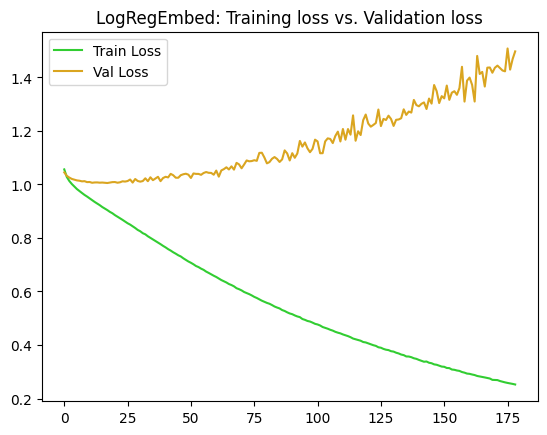

In [ ]:
n = "LogRegEmbed: Training loss vs. Validation loss"
#plot_metric(train_metric=train_loss_history_r3d, eval_metric=val_loss_history_r3d, train_metric_name="R3D train", eval_metric_name="R3D val", plot_name=n, c1=color1, c2=color2)
plot_metric(train_metric=Best_Losses['train'], eval_metric=Best_Losses['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



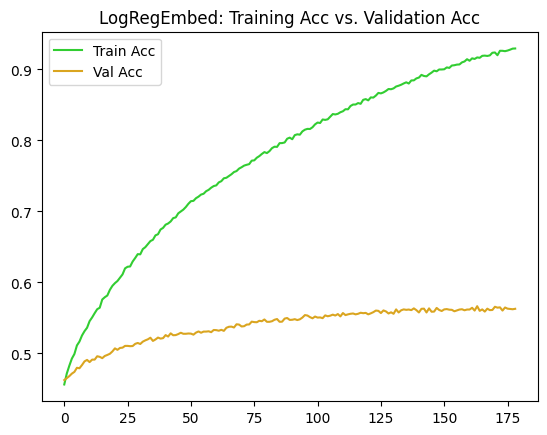

In [ ]:

n = "LogRegEmbed: Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs['train'], eval_metric=Best_Accs['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)




Accuracy_score: 0.5383868715083799


classification_report: 
              precision    recall  f1-score   support

        Alta       0.52      0.38      0.44    190277
       Media       0.56      0.69      0.62    407941
       Bassa       0.51      0.41      0.46    260982

    accuracy                           0.54    859200
   macro avg       0.53      0.50      0.50    859200
weighted avg       0.53      0.54      0.53    859200





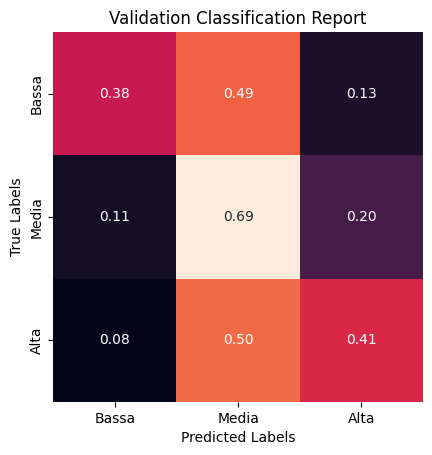

In [ ]:
# Confusion Matrix for the best model on the validation set
confusion_matrix_score(ytest=Best_Labels_Preds['labels'], ypred=Best_Labels_Preds['preds'], name='Validation ')

In [ ]:
Labels_Preds_test = gs_model_lrv.predict(model=gs_model_lrv.best_model, test_loader=test_vocab_dataloader)
# Loss: 1.4540746430961453, Accuracy: 0.5049426020408163

Loss: 1.4540746430961453, Accuracy: 0.5049426020408163




Accuracy_score: 0.5050113158745555


classification_report: 
              precision    recall  f1-score   support

        Alta       0.44      0.32      0.37      1374
       Media       0.54      0.64      0.59      2953
       Bassa       0.47      0.42      0.45      1859

    accuracy                           0.51      6186
   macro avg       0.48      0.46      0.47      6186
weighted avg       0.50      0.51      0.50      6186





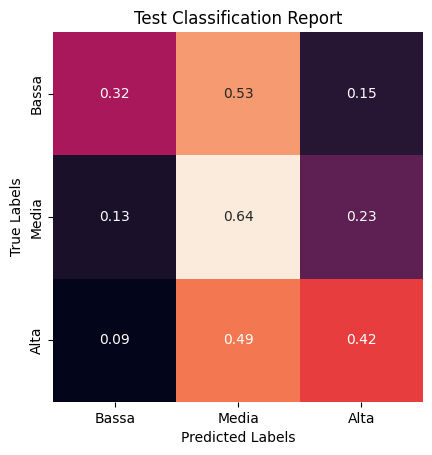

In [ ]:
# Confusion Matrix for the best model on the test set
confusion_matrix_score(ytest=Labels_Preds_test['labels'], ypred=Labels_Preds_test['preds'], name='Test ')

## LSTM Family

We will stick with the same architecture introduced in [Notebook #4](https://https://colab.research.google.com/drive/1Z4ogGO58owxu0e9-hbUtjJYqud3OuJ1H), i.e. a simple BiLSTM architecture on the input sequence.

We will then apply a simple feed-forward layer to the last hidden state to classify the whole sentence as either positive or negative.

But we also need to map each token to an embedding through an Embedding layer.


![](https://www.researchgate.net/publication/336899835/figure/fig2/AS:819722442518530@1572448468976/Sequence-to-Label-classification-using-LSTM-NN.jpg)


## Handling padding tokens

Our Dataset class return a Tensor (batch) for every training step. Each sentence present in the batch must have the same length, so the padding token is added to fill missing tokens.

![](https://juditacs.github.io/assets/padded_sequence.png)

We need to avoid the error computation (gradient flow) to go through the input's padding tokens. To do so, in PyTorch, you can use `pack_padded_sequence` ([doc](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_packed_sequence.html)) from `torch.utils.rnn`, a function that removes the padding tokens from the input and gives to the model only the relevant tokens. It does so by keeping in memory two tensors, 1) the flattened element sequence, 2) the batch sizes at each time step (which is dynamically updated at each timestep, based on the sequence lengths). For instance:

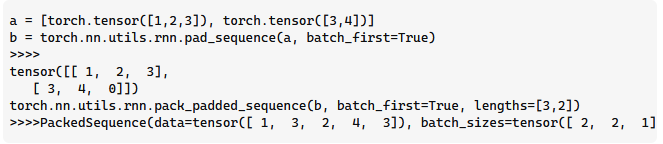

### Load the datasets compatible with the BiLSTM model

- Note that we can sue the same dataset class previously defined
- However, we will need to modify the collate method to return a trplet of (input_ids, lengths, labels)
- This is done by simply passing the  `modify_collate_fn=True` parameter during the Dataset class instantiation.
- That's all!

In [ ]:
# @title Preprocess and build the datasets for training and validation for the BiLSTM model

train_lstm_arousal = SentenceClassificationDataset(file_path=file_paths.train_path_arousal,
                                                      config=config,
                                                      name='Arousal',
                                                      train=True,
                                                      test_vocabulary=None, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000,
                                                      modify_collate_fn=True
                                                   )

train_lstm_dominance = SentenceClassificationDataset(file_path=file_paths.train_path_dominance,
                                                      config=config,
                                                      name='Dominance',
                                                      train=True,
                                                      test_vocabulary=None, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000,
                                                      modify_collate_fn=True
                                                      )

train_lstm_valence = SentenceClassificationDataset(file_path=file_paths.train_path_valence,
                                                      config=config,
                                                      name='Valence',
                                                      train=True,
                                                      test_vocabulary=None, # required for testing
                                                      tokenizer=None,
                                                      embedding_type='custom',
                                                      max_vocab_size=10_000,
                                                      modify_collate_fn=True
                                                    )



In [ ]:
# @title Combine the training datasets into one

train_lstm_arousal.add(train_vocab_dominance)
train_lstm_arousal.add(train_vocab_valence)

train_lstm_arousal.df_preprocessed.head(3)
# train_vocab_arousal[0]

,text,label,choices,dimension,label_remapped,tokens
0,Arousal: Auguriamo a voi e alla vostra famigli...,2,"[Media, Alta, Bassa]",Arousal,0,"[arousal, auguriamo, famiglia, gioia, amore]"
1,Arousal: Ha anche respinto le notizie secondo ...,2,"[Media, Alta, Bassa]",Arousal,0,"[arousal, respinto, notizie, dimissioni, deriv..."
2,Arousal: 27 aprile 2009 12:07 Padraic Ryan: Og...,2,"[Media, Bassa, Alta]",Arousal,2,"[arousal, 27, aprile, 2009, 12, 07, padraic, r..."


In [ ]:
# Let's check the sizes
num_samples, num_features = train_lstm_arousal.df_preprocessed.shape
print(f"The DataFrame has {num_samples} samples and {num_features} features.")


The DataFrame has 24000 samples and 6 features.


In [ ]:
# @title Split the Training datasets into training and validation sets

train_lstm, val_lstm = train_lstm_arousal.split(ratio=0.2)
print(f"Train: {len(train_lstm)}, Validation: {len(val_lstm)}")

Train: 19200, Validation: 4800


In [ ]:

print(f"Before: train_lstm_arousal.modify_collate_fn: {train_lstm_arousal.modify_collate_fn}, train_lstm.modify_collate_fn: {train_lstm.modify_collate_fn}, val_lstm.modify_collate_fn: {val_lstm.modify_collate_fn}")

# train_lstm.modify_collate_fn = True
# val_lstm.modify_collate_fn = True

# print(f"After: train_lstm_arousal.modify_collate_fn: {train_lstm_arousal.modify_collate_fn}, train_lstm.modify_collate_fn: {train_lstm.modify_collate_fn}, val_lstm.modify_collate_fn: {val_lstm.modify_collate_fn}")



Before: train_lstm_arousal.modify_collate_fn: True, train_lstm.modify_collate_fn: True, val_lstm.modify_collate_fn: True


In [ ]:
# @title Do the same things with the test dataset

test_lstm = SentenceClassificationDataset(file_path=file_paths.test_path_arousal,
                                          config=config,
                                          name='Arousal',
                                          train=False,
                                          test_vocabulary=train_lstm.vocabulary, # required for testing
                                          tokenizer=None,
                                          embedding_type='custom',
                                          max_vocab_size=10_000,
                                          modify_collate_fn=True
                                          )

test_lstm_dominance = SentenceClassificationDataset(file_path=file_paths.test_path_dominance,
                                                    config=config,
                                                    name='Dominance',
                                                    train=False,
                                                    test_vocabulary=train_lstm.vocabulary, # required for testing
                                                    tokenizer=None,
                                                    embedding_type='custom',
                                                    max_vocab_size=10_000,
                                                    modify_collate_fn=True
                                                    )

test_lstm_valence = SentenceClassificationDataset(file_path=file_paths.test_path_valence,
                                                  config=config,
                                                  name='Valence',
                                                  train=False,
                                                  test_vocabulary=train_lstm.vocabulary, # required for testing
                                                  tokenizer=None,
                                                  embedding_type='custom',
                                                  max_vocab_size=10_000,
                                                  modify_collate_fn=True
                                                  )

test_lstm.add(test_lstm_dominance)
test_lstm.add(test_lstm_valence)

# set the test vocabulary to the trianing vocabulary
test_lstm.vocabulary = train_lstm.vocabulary

# Let's check the sizes
num_samples, num_features = test_lstm.df_preprocessed.shape
print(f"The DataFrame for testing has {num_samples} samples and {num_features} features.")

test_lstm_dominance[0]
# next(iter(test_vocab))
for idx, (input_ids, labels) in enumerate(test_lstm):
    print(f"input_ids: {input_ids}, labels: {labels}")
    if idx == 2: break


The DataFrame for testing has 6186 samples and 6 features.
input_ids: [2, 60, 77, 31, 1, 8549, 1, 7721, 1, 15834], labels: 1
input_ids: [2, 832, 2276, 7178, 1, 1, 4574], labels: 2
input_ids: [2, 5192, 1, 1, 5, 2943, 1, 6, 1], labels: 1


In [ ]:
# @title Create the dataloaders

train_lstm_dataloader = train_lstm.get_dataloader(dataset=train_lstm, batch_size=config.batch_size, random_state=seed)
val_lstm_dataloader = val_lstm.get_dataloader(dataset=val_lstm, batch_size=config.batch_size, random_state=seed)

test_lstm_dataloader = test_lstm.get_dataloader(dataset=test_lstm, batch_size=config.batch_size, random_state=seed)

# for idx, (input_ids, lengths, labels) in enumerate(val_lstm_dataloader):
#     print(f"Val: Batch size: {input_ids.shape[0]}, Max seq len for this batch: {input_ids.shape[1]}, \nlabels: {labels} \nLengths: {lengths}")
#     if idx == 1: break

# print("\n\n")

# for idx, (input_ids, lengths, labels) in enumerate(train_lstm_dataloader):
#     print(f"Train: Batch size: {input_ids.shape[0]}, Max seq len for this batch: {input_ids.shape[1]}, \nlabels: {labels} \nLengths: {lengths}")
#     if idx == 1: break


### Define the BiLSTM model

In [ ]:
# @title BiLSTM Model class

# %%writefile -a "{file_paths.working_folder}/log_reg_with_emb.py"

class BiLSTMModel(nn.Module):

    def __init__(self,
                  num_classes: int=3,
                  optimizer: torch.optim.Optimizer=None,
                  criterion=nn.CrossEntropyLoss(),
                  scheduler=None,
                  vocab_size: int=config.max_sequence_length,
                  embedding_type: Optional[str]='custom',
                  padding_idx: int=padding_idx,
                  embedding_dim: int=config.embedding_size,
                  lstm_num_layers: int=2,
                  lstm_dropout: float=0.2,
                  bidirectional: bool=True
              ) -> None:

        super(BiLSTMModel, self).__init__()

        # Call the super constructor. We have access to the embedding layers
        # super().__init__(num_classes=num_classes,
        #                 optimizer=optimizer,
        #                 criterion=criterion,
        #                 scheduler=scheduler,
        #                 vocab_size=vocab_size,
        #                 embedding_type=embedding_type,
        #                 padding_idx=padding_idx,
        #                 embedding_dim=embedding_dim
        #                  )

        # Set anomaly detection mode to True for debugging purposes
        torch.autograd.set_detect_anomaly(True)

        if embedding_type == 'pretrained':
            embedding_dim = 300
            # Freeze the pretrained embeddings
            self.embedding = nn.Embedding.from_pretrained(GloVe(name='6B', dim=embedding_dim).vectors, freeze=True)
        elif embedding_type == 'custom':
            self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                          embedding_dim=embedding_dim,
                                          padding_idx=padding_idx, # avoid updating the gradient of padding entries
                                          device=config.device
                                          )
        else:
            raise ValueError(f"embedding_type must be one of ['pretrained', 'custom']")

        # BiLSTM
        self.bilstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=embedding_dim,
            num_layers=lstm_num_layers,
            batch_first=True,
            dropout=lstm_dropout,
            bidirectional=bidirectional,
            device=config.device
        )

        # self.linear = nn.Linear(
        #     in_features=embedding_dim * 2,
        #     out_features=num_classes,
        #     device=config.device
        # )

        self.linear = nn.Sequential(
            nn.Linear(in_features=embedding_dim * 2, out_features=embedding_dim, device=config.device),
            nn.BatchNorm1d(num_features=embedding_dim, device=config.device),
            nn.LeakyReLU(),
            nn.Linear(in_features=embedding_dim, out_features=num_classes, device=config.device)
        )

        self.optimizer = torch.optim.Adam(self.parameters(), lr=config.learning_rate) if optimizer is None else optimizer
        self.criterion = criterion
        # self.lr_scheduler = lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='min', factor=0.01, patience=2, min_lr=1e-15) if scheduler is None else scheduler
        self.lr_scheduler = scheduler

        # Move to device -> inplace operation
        self.to(config.device)


    def forward(self, input_ids: torch.Tensor, sequence_lengths: torch.Tensor) -> torch.Tensor:

        # First we embed the input tokens
        embeds = self.embedding(input_ids) # [B, S, H]
        # where B is the batch size, S is the sequence length and H is the hidden dimension

        # Pack the sequence to avoid gradient descent on padding tokens.
        # An alternative to packing sequences is using masking.
        packed = pack_padded_sequence(embeds, sequence_lengths, batch_first=True, enforce_sorted=False)

        # Then we pass it to the BiLSTM
        # The first output of the BiLSTM tuple, packed_output, is of size B x S x 2H,
        # where B is the batch size, S is the sequence length and H is the hidden dimension
        # hidden_state is of size [2 * num_layers, B, H], where the 2 is because we are using BiLSTMs instead of LSTMs.
        # cell_state has size [2 * num_layers, B, C] where C is the cell dimension of the internal LSTMCell.
        packed_output, (hidden_state, cell_state) = self.bilstm(packed)

        # We take the last two hidden representations of the BiLSTM (the second-to-last layer's output is forward; last
        # layer's is backward) by concatenating forward and backward over dimension 1.
        # Both tensors have shapes of [B, H], so concatenating them along the second dimension (dim 1) results in a new
        # tensor of shape [B, 2 * H]
        hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1)

        # Finally we project to the two final classes and return the logits of each class
        logits = self.linear(hidden) # [B, 2]
        return logits

    def training_step(self, train_loader=train_loader):
        # Train the model
        self.train()

        Loss = 0
        Accuracy = 0

        for input_ids, lengths, labels in train_loader:

            # Move to device -> not inplace operation
            input_ids = input_ids.to(config.device)
            labels = labels.to(config.device)
            # lengths = lengths.to(config.device)

            outputs = self(input_ids, lengths)
            # print(f"outputs.shape: {outputs.shape}")

            loss = self.criterion(outputs.squeeze(), labels)
            Loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            accuracy = torch.sum(preds == labels) / len(labels)
            Accuracy += accuracy.item()

            # Backprop
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        Loss /= len(train_loader)
        Accuracy /= len(train_loader)

        return Loss, Accuracy

    # https://discuss.pytorch.org/t/pytorch-torch-no-grad-vs-torch-inference-mode/134099
    @torch.inference_mode() # Better than torch.no_grad() bec no version and bump tracking
    def validation_step(self, val_loader=val_loader):
        # Validate the model
        self.eval()

        # Stats for confusion maatrix calculation
        Labels_Preds = {'labels': [], 'preds': []}

        Loss = 0
        Accuracy = 0

        for input_ids, lengths, labels in val_loader:

            # Move to device -> not inplace operation
            input_ids = input_ids.to(config.device)
            labels = labels.to(config.device)
            # lengths = lengths.to(config.device)

            outputs = self(input_ids, lengths)

            loss = self.criterion(outputs.squeeze(), labels)
            Loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            accuracy = torch.sum(preds == labels) / len(labels)
            Accuracy += accuracy.item()

            Labels_Preds['labels'] += labels.tolist()
            Labels_Preds['preds'] += preds.tolist()

        Loss /= len(val_loader)
        Accuracy /= len(val_loader)

        # print(f"Validation Loss: {Loss} | Validation Accuracy: {Accuracy}")

        return Loss, Accuracy, Labels_Preds

    def train_loop(self,
                   train_loader=train_loader,
                   eval_loader=val_loader,
                   num_epochs=10,
                   patience=10,
                   epsilon_increment=0.001,
                   use_pretrain=False,
                   enable_extras: bool = False
                   ):

        # Statistics variables for plotting
        Losses = {'train': [], 'val': []}
        Accs = {'train': [], 'val': []}
        Labels_Preds = {'labels': [], 'preds': []}
        epoch = 0

        # global best_metric
        best_metric = 0 #float('inf')

        # Initialize a variable to keep track of the number of epochs since the best value was seen
        epochs_since_improvement = 0

        checkpoint_path = f"{file_paths.working_folder}/checkpoint.pth"
        statistics_path = f"{file_paths.working_folder}/statistics.pth"
        if use_pretrain and os.path.exists(checkpoint_path) and os.path.exists(statistics_path):
            checkpoint = torch.load(checkpoint_path)
            self.load_state_dict(checkpoint['state_dict'])
            self.optimizer.load_state_dict(checkpoint['optimizer'])

            Losses, Accs, Labels_Preds = torch.load(statistics_path)

            epoch       = len(Losses['train'])
            best_metric = max( Accs['val'] )

            print(f"Model loaded | Epoch: {epoch} | best_metric: {best_metric*100}%")

        # Loop over the entire dataset for num epochs
        for epoch in range(epoch, num_epochs, 1):

            train_loss, train_acc = self.training_step(train_loader) # Training step
            val_loss, val_acc, labels_preds = self.validation_step(eval_loader) # Validation step

            Labels_Preds['labels'] += labels_preds['labels']
            Labels_Preds['preds'] += labels_preds['preds']

            Losses['train'].append(train_loss)
            Accs['train'].append(train_acc)

            Losses['val'].append(val_loss)
            Accs['val'].append(val_acc)

            print(f"\n{'--'*40} \nEpoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Train Acc: {train_acc*100}% | Val Loss: {val_loss:.6f} | Val Acc: {val_acc*100}%")

            # Extras
            ###############################################################################
            if enable_extras:

                # If the monitored metric has improved, save the current model weights as
                # the best and update the best value of the metric seen so far
                epochs_since_improvement += 1

                # lr scheduler step
                if self.lr_scheduler is not None:
                    self.scheduler.step(val_loss)

                #if val_loss < best_metric:
                if val_acc > best_metric:

                    # This would make sure to terminate early if there's no or only negligible increment in accuracy
                    # That's, set it to 0 if there's non trivial increment in accuracy, e.g., acc < 0.5% is trivial.
                    #if val_loss + epsilon_increment < best_metric:
                    if (val_acc - best_metric)*100 > epsilon_increment:
                        epochs_since_improvement = 0

                    best_metric = val_acc

                    checkpoint = {'state_dict': self.state_dict(),
                                  'optimizer' : self.optimizer.state_dict()
                                }
                    torch.save(checkpoint, checkpoint_path)
                    print(f"Model saved | Epoch: {epoch} | best_metric: {best_metric*100}%")

                metrices = (Losses, Accs)
                torch.save(metrices, statistics_path)

                # Print progress
                print(f"Epochs since improvement: {epochs_since_improvement}, remaining='patience'-'epochs_since_improvement': {patience - epochs_since_improvement}")

                # If the model's 'monitored metrics' has not been improved for more than 'patience' times, then break...
                if epochs_since_improvement >= patience:
                    print(f"""\n{'@'*40}\nepochs_since_improvement ({epochs_since_improvement}) >= patience ({patience}): {epochs_since_improvement >= patience}
                          \nThe model's monitored metrics ('best_metric': {best_metric}) has not been improved for more than 'patience' ({patience}) times. So,terminating...
                          \n{'@'*40}\n""")
                    break

        return Losses, Accs, Labels_Preds

    @torch.inference_mode()
    def predict(self, texts: Union[pd.DataFrame, list[str]], vocabulary, config: Config=Config()):
        """Predict the class of the given text.

        Args:
            texts (Union[pd.DataFrame, list[str]]): The text to be classified.

        Returns:
            list: The predicted class of the text.
        """

        if type(texts) != pd.core.frame.DataFrame:
            texts = pd.DataFrame(texts, columns=['text'])

        self.eval()

        text_preprocessed = preprocess_data(texts, config)
        text_preprocessed['tokens'] = text_preprocessed['text'].apply(lambda x: x.split())
        input_ids = [ torch.tensor(vocabulary(tokens) ) for tokens in text_preprocessed['tokens']]
        input_ids_padded = pad_sequence(input_ids, batch_first=True, padding_value=vocabulary[config.pad_token])  # Shape: (batch_size, max_seq_len)
        input_ids_padded = input_ids_padded.to(config.device)

        # lengths = text_preprocessed['tokens'].apply(lambda x: len(x)).tolist()
        lengths = torch.tensor([len(input_id) for input_id in input_ids], dtype=torch.int)  # Shape: (batch_size)
        # Must not be put to the GPU

        logits = self(input_ids_padded, lengths)
        outputs_softmax = F.softmax(input=logits, dim=-1).squeeze()
        outputs = torch.argmax(outputs_softmax, dim=-1).cpu().detach().numpy()
        return outputs_softmax, outputs

    def num_parameters(self) -> int:
        """Returns the number of trainable parameters in the model."""
        return sum([p.numel() for p in self.parameters()])



In [ ]:
# @title Number of Parameters of our BiLstm model

# Initialize the model
bilstm_model = BiLSTMModel(num_classes=config.num_classes,
                            optimizer=None,
                            criterion=nn.CrossEntropyLoss(),
                            scheduler=None,
                            vocab_size=vocab_size,
                            embedding_type='custom',
                            padding_idx=padding_idx,
                            embedding_dim=config.embedding_size,
                            lstm_num_layers=2,
                            lstm_dropout=0.2,
                            bidirectional=True
                            )
num_params = bilstm_model.num_parameters()
print(f'Number of parameters of the BiLSTM model with {2} layers: {num_params}')

Number of parameters of the BiLSTM model with 2 layers: 9139803


In [ ]:
# @title Grid Search version 3 for the Bi-LSTM model with Embeddings

class GridSearch3:
      def __init__(self):

          self.best_params = None
          self.best_accuracy = 0
          self.best_model = None
          self.Best_Losses, self.Best_Accs, self.Best_Labels_Preds = None, None, None

      def fit(self,
              model: Optional[nn.Module]=None,
              param_grid: Optional[Dict] = None,
              train_loader: torch.utils.data.DataLoader = train_loader,
              val_loader: torch.utils.data.DataLoader = val_loader,
              num_epochs: int=config.epochs,
              patience: int=config.patience,
              use_pretrain: bool=False,
              enable_extras: bool = True,
              lstm_num_layers: int = 2, # ignored for now, search for it instead
              lstm_dropout: float = 0.2,
              bidirectional: bool = True
              ) -> Tuple[Dict, Dict, Dict]:

          # This way, when testing, I don't have to wait for epoch end.
          if model is None:
              # model = LogisticRegression(input_size=config.input_size, num_classes=config.num_classes, criterion=nn.CrossEntropyLoss())
              model = BiLSTMModel(num_classes=config.num_classes,
                                  optimizer=None,
                                  criterion=nn.CrossEntropyLoss(),
                                  scheduler=None,
                                  vocab_size=vocab_size,
                                  embedding_type='custom',
                                  padding_idx=padding_idx,
                                  embedding_dim=config.embedding_size,
                                  lstm_num_layers=lstm_num_layers,
                                  lstm_dropout=lstm_dropout,
                                  bidirectional=bidirectional
                                  )
          else:
              # Check if model is an instance of nn.Module
              assert isinstance(model, nn.Module), "model must be an instance of nn.Module"

          self.best_model = model

          # Define a parameter grid
          if param_grid is None:
              # the pretrained model is slow
              emtype = ['custom', 'pretrained'] if config.use_pretrain else ['custom']
              param_grid = {
                  'embed_type': emtype,
                  'num_layers': [2, 4, 6],
                  'optimizer': [# torch.optim.Adam,
                                torch.optim.AdamW,
                                # torch.optim.SGD
                                ],
                  'lr_sched': ['ReduceLROnPlateau'] #, None, 'ExponentialLR', 'CosineAnnealingLR'],
              }

          # Perform grid search manually
          for embed_type, num_layer, optimizer, lr_sched in itertools.product(param_grid['embed_type'], param_grid['num_layers'], param_grid['optimizer'], param_grid['lr_sched']):

              # TODO: Start model with the weights of the mdoel above. If None, then they arae equivalent.
              model = BiLSTMModel(num_classes=config.num_classes,
                                  optimizer=None,
                                  criterion=nn.CrossEntropyLoss(),
                                  scheduler=None,
                                  vocab_size=vocab_size,
                                  embedding_type=embed_type,
                                  padding_idx=padding_idx,
                                  embedding_dim=config.embedding_size,
                                  lstm_num_layers=num_layer,
                                  lstm_dropout=lstm_dropout,
                                  bidirectional=bidirectional
                                  )

              optimizer = optimizer(model.parameters(), lr=config.learning_rate)

              # Lr schedulers
              if lr_sched == 'ReduceLROnPlateau':
                  scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-15)
              elif lr_sched == 'ExponentialLR':
                  # This scheduler decreases the learning rate exponentially by a factor (gamma) every epoch.
                  scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.1) # decay factor = gamma after each epoch
              elif lr_sched == 'CosineAnnealingLR':
                  # T_max: maximum number of epochs for the cosine annealing schedule, and eta_min:minimum learning rate value.
                  scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-15, verbose=True)
              elif lr_sched == 'CyclicLR':
                  scheduler = lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1, step_size_up=2000, cycle_momentum=False)
              elif lr_sched == 'OneCycleLR':
                  scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=1e-1, epochs=100, steps_per_epoch=len(train_loader))
              else:
                  # Raise ValueError(f"lr_sched must be one of ['ReduceLROnPlateau', 'ExponentialLR', 'CosineAnnealingLR', 'CyclicLR', 'OneCycleLR']")
                  scheduler = None

              # Modify the model with the current parameters
              model.optimizer = optimizer
              model.scheduler = scheduler

              print(f"\n{'#'*80} \nStarting training | Embedding type: {embed_type} | Num BiLSTM layers : {num_layer} | optimizer: {optimizer.__class__.__name__} | lr_scheduler: {lr_sched}")

              # Train the model
              Losses, Accs, Labels_Preds = model.train_loop(train_loader=train_loader,
                                                            eval_loader=val_loader,
                                                            num_epochs=num_epochs,
                                                            patience=patience,
                                                            epsilon_increment=0.01,
                                                            use_pretrain=use_pretrain,
                                                            enable_extras=enable_extras
                                                            )

              # Get validation accuracy
              val_accuracy = torch.max(torch.tensor(Accs['val']) ).item()
              # Weighted average of accuracy and loss
              # weighted_best = 0.2*loss + acc*0.8

              # Check if current model is the best so far
              if val_accuracy > self.best_accuracy:
                  self.best_accuracy = val_accuracy
                  self.best_params = {'optimizer': optimizer, 'lr_sched': lr_sched}
                  self.best_model = model
                  self.Best_Losses = Losses
                  self.Best_Accs = Accs
                  self.Best_Labels_Preds = Labels_Preds

                  print(f"\n{'@'*100}\nBest Model | val_acc: {val_accuracy*100}% | Embedding type: {embed_type} | Num BiLSTM Layers: {num_layer} | optimizer: {optimizer.__class__.__name__} | lr_sched: {lr_sched}\n{'@'*100}\n")

          print(f"\n{'#'*80}")
          print(f"Final Best Parameters: Embedding type: {embed_type} | Num BiLSTM Layers: {num_layer} | Optimizer: {self.best_params['optimizer'].__class__.__name__}, Learning Rate Scheduler: {self.best_params['lr_sched']}")
          print("Final Best Validation Accuracy:", self.best_accuracy)

          return self.Best_Losses, self.Best_Accs, self.Best_Labels_Preds

      def predict(self,
                  model: Optional[nn.Module]=None,
                  test_loader: torch.utils.data.DataLoader = test_loader
                  ) -> Dict:

          if model is None:
              # self.best_model.load_state_dict(torch.load(f"{file_paths.working_folder}/checkpoint.pth")['state_dict'])
              loss, acc, Labels_Preds_test = self.best_model.validation_step(test_loader)
          else:
              # model.eval() # Already set to evaluation mode in the validation_step
              loss, acc, Labels_Preds_test = model.validation_step(test_loader)

          print(f'Loss: {loss}, Accuracy: {acc}')

          return Labels_Preds_test

gs_model_bilstm = GridSearch3()


In [ ]:
# @title Train the model

# Initialize the model, loss function, and optimizer
# bilstm = BiLSTMModel(num_classes=config.num_classes,
#                     optimizer=torch.optim.Adam,
#                     criterion=nn.CrossEntropyLoss(),
#                     scheduler=None,
#                     vocab_size=vocab_size,
#                     embedding_type='custom',
#                     padding_idx=padding_idx,
#                     embedding_dim=config.embedding_size,
#                     bilstm_layers=2,
#                     bilstm_dropout=0.2,
#                     bidirectional=True
#                   )

# Losses, Accs, Labels_preds = bilstm.train_loop(train_loader=train_bilstm_dataloader,
#                                                 eval_loader=val_bilstm_dataloader,
#                                                 num_epochs=20,
#                                                 patience=5,
#                                                 use_pretrain=False,
#                                                 enable_extras=True
#                                                 )


Best_Losses, Best_Accs, Best_Labels_Preds = gs_model_bilstm.fit(model=None, # Start from scratch for each combination of param_grid
                                                              train_loader=train_lstm_dataloader,
                                                              val_loader=val_lstm_dataloader,
                                                              num_epochs=config.epochs,
                                                              patience=config.patience,
                                                              use_pretrain=False,
                                                              enable_extras=True,
                                                              lstm_num_layers=4, # ignored for now
                                                              lstm_dropout=0.2,
                                                              bidirectional=True
                                                              )





################################################################################ 
Starting training | Embedding type: custom | Num BiLSTM layers : 2 | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.175823 | Train Acc: 33.651041666666664% | Val Loss: 1.075632 | Val Acc: 41.13898026315789%
Model saved | Epoch: 0 | best_metric: 41.13898026315789%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 1.017432 | Train Acc: 47.463541666666664% | Val Loss: 1.019874 | Val Acc: 48.026315789473685%
Model saved | Epoch: 1 | best_metric: 48.026315789473685%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 0.9653

In [ ]:
# Final Best Parameters: Embedding type: custom | Num BiLSTM Layers: 6 | Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.6021792888641357

#### Plot losses and accuracies

In [ ]:
Best_Losses = gs_model_bilstm.Best_Losses
Best_Accs = gs_model_bilstm.Best_Accs
Best_Labels_Preds = gs_model_bilstm.Best_Labels_Preds

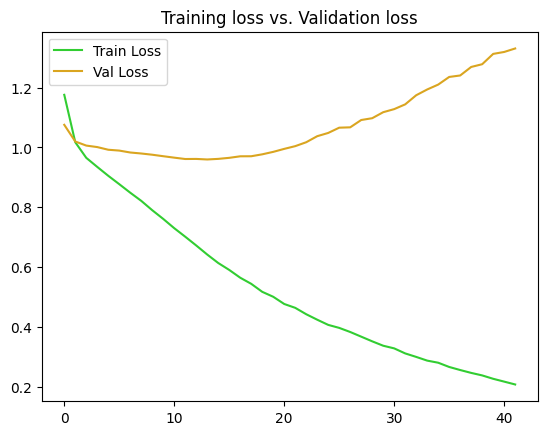

In [ ]:
n = "Training loss vs. Validation loss"
#plot_metric(train_metric=train_loss_history_r3d, eval_metric=val_loss_history_r3d, train_metric_name="R3D train", eval_metric_name="R3D val", plot_name=n, c1=color1, c2=color2)
plot_metric(train_metric=Best_Losses['train'], eval_metric=Best_Losses['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



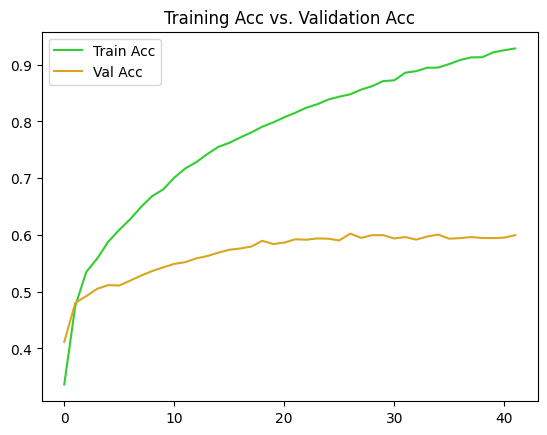

In [ ]:

n = "Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs['train'], eval_metric=Best_Accs['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)




Accuracy_score: 0.5671875


classification_report: 
              precision    recall  f1-score   support

        Alta       0.58      0.44      0.50     44646
       Media       0.58      0.66      0.62     95718
       Bassa       0.54      0.51      0.53     61236

    accuracy                           0.57    201600
   macro avg       0.57      0.54      0.55    201600
weighted avg       0.57      0.57      0.56    201600





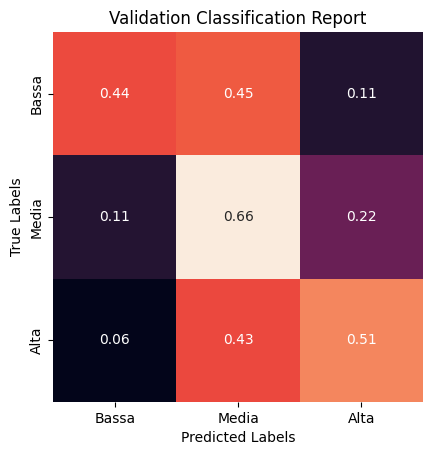

In [ ]:
# Confusion Matrix for the best model on the validation set
confusion_matrix_score(ytest=Best_Labels_Preds['labels'], ypred=Best_Labels_Preds['preds'], name='Validation ')

In [ ]:
# Test the model
Labels_Preds_test = gs_model_bilstm.predict(model=gs_model_bilstm.best_model, test_loader=test_lstm_dataloader)
# Loss: 1.6904713377660634, Accuracy: 0.5007744169965083

Loss: 1.6904713377660634, Accuracy: 0.5007744169965083




Accuracy_score: 0.5017782088587133


classification_report: 
              precision    recall  f1-score   support

        Alta       0.43      0.26      0.32      1374
       Media       0.52      0.71      0.60      2953
       Bassa       0.49      0.35      0.41      1859

    accuracy                           0.50      6186
   macro avg       0.48      0.44      0.44      6186
weighted avg       0.49      0.50      0.48      6186





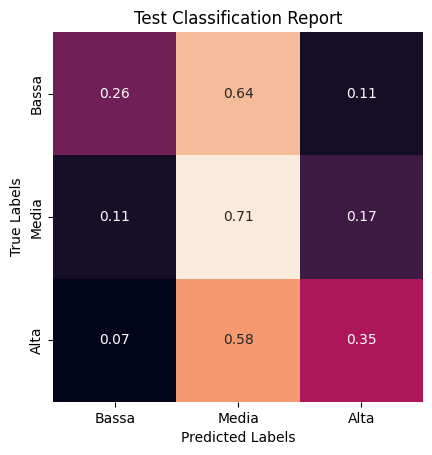

In [ ]:
# Confusion Matrix for the best model on the test set
confusion_matrix_score(ytest=Labels_Preds_test['labels'], ypred=Labels_Preds_test['preds'], name='Test ')

### Extra

- From the datasets we can see that, even though all of them have the same 'text' per each row, they may have different labels.
- For example, in this particular row, all the three have different labels with the same text.:
  - Arousal text: "Arousal: I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita."
 - Arousal label: 2

  - Valence text: Valence: I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.
  - Valence label: 1

  - Dominance text: Dominance: I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.
  - Dominance label: 0

- Now, if a model predicts 0 (Bassa), does it predict it for Arousal, valence or dominance? Or all three?
- To solve this problem,
  1. we can use three different models for each dataset. It is good to separate the models to ensure stability during training and early convergence. Then, either:
    1. Take the mean of the three models' outputs.
    2. Take the output from the model that has the highest output probability (max of the three models' outputs).
    3. Do 'majority voting' on the three models' outputs. That is, take the mode of the predictions from the 3 models $\implies$ if the majority of the three models' outputs is 0, then that output is taken as the majority decision.

  1. An alternative to the three different models is to use one model but with three different classification heads.

Let's see what we can do with this.

In [ ]:

txt1 = train_vocab_arousal.df_preprocessed.iloc[3]['text']
txt2 = train_vocab_valence.df_preprocessed.iloc[3]['text']
txt3 = train_vocab_dominance.df_preprocessed.iloc[3]['text']

l1 = train_vocab_arousal.df_preprocessed.iloc[3]['label_remapped']
l2 = train_vocab_valence.df_preprocessed.iloc[3]['label_remapped']
l3 = train_vocab_dominance.df_preprocessed.iloc[3]['label_remapped']

print(f"Arousal text: {txt1} \n Arousal label: {l1} \n\nValence text: {txt2}\n Valence label: {l2}\n\nDominance text: {txt3}\n Dominance label: {l3}")

Arousal text: Arousal: I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita. 
 Arousal label: 2 

Valence text: Valence: I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.
 Valence label: 1

Dominance text: Dominance: I drastici cambi di tempo e metro e le prime apparizioni di articolazioni di staccato rendono chiaro all'ascoltatore che l'introduzione è finita.
 Dominance label: 0


#### Using three different models

- Here, we won't merge the datasets. Instead, we will use different models for each dataset as we will see in the next section.

In [ ]:
# @title Preprocess and build the datasets for training and validation for the BiLSTM model

train_lstm_arousal = SentenceClassificationDataset(file_path=file_paths.train_path_arousal,
                                                    config=config,
                                                    name='Arousal',
                                                    add_name_to_text=False,
                                                    train=True,
                                                    test_vocabulary=None, # required for testing
                                                    tokenizer=None,
                                                    embedding_type='custom',
                                                    max_vocab_size=10_000,
                                                    modify_collate_fn=True
                                                   )

train_lstm_dominance = SentenceClassificationDataset(file_path=file_paths.train_path_dominance,
                                                    config=config,
                                                    name='Dominance',
                                                    add_name_to_text=False,
                                                    train=True,
                                                    test_vocabulary=None, # required for testing
                                                    tokenizer=None,
                                                    embedding_type='custom',
                                                    max_vocab_size=10_000,
                                                    modify_collate_fn=True
                                                      )

train_lstm_valence = SentenceClassificationDataset(file_path=file_paths.train_path_valence,
                                                  config=config,
                                                  name='Valence',
                                                  add_name_to_text=False,
                                                  train=True,
                                                  test_vocabulary=None, # required for testing
                                                  tokenizer=None,
                                                  embedding_type='custom',
                                                  max_vocab_size=10_000,
                                                  modify_collate_fn=True
                                                    )



In [ ]:
# @title Split the Training datasets into training and validation sets

train_lstm_arousal, val_lstm_arousal = train_lstm_arousal.split(ratio=0.2)
train_lstm_dominance, val_lstm_dominance = train_lstm_dominance.split(ratio=0.2)
train_lstm_valence, val_lstm_valence = train_lstm_valence.split(ratio=0.2)
print(f"Train: {len(train_lstm)}, Validation: {len(val_lstm)}")

Train: 19200, Validation: 4800


In [ ]:

print(f"Before: train_lstm_arousal.modify_collate_fn: {train_lstm_arousal.modify_collate_fn}, train_lstm.modify_collate_fn: {train_lstm.modify_collate_fn}, val_lstm.modify_collate_fn: {val_lstm.modify_collate_fn}")

# train_lstm.modify_collate_fn = True
# val_lstm.modify_collate_fn = True

# print(f"After: train_lstm_arousal.modify_collate_fn: {train_lstm_arousal.modify_collate_fn}, train_lstm.modify_collate_fn: {train_lstm.modify_collate_fn}, val_lstm.modify_collate_fn: {val_lstm.modify_collate_fn}")



Before: train_lstm_arousal.modify_collate_fn: True, train_lstm.modify_collate_fn: True, val_lstm.modify_collate_fn: True


In [ ]:
# @title Do the same things with the test dataset

test_lstm_arousal = SentenceClassificationDataset(file_path=file_paths.test_path_arousal,
                                          config=config,
                                          name='Arousal',
                                          add_name_to_text=False,
                                          train=False,
                                          test_vocabulary=train_lstm_arousal.vocabulary, # required for testing
                                          tokenizer=None,
                                          embedding_type='custom',
                                          max_vocab_size=10_000,
                                          modify_collate_fn=True
                                          )

test_lstm_dominance = SentenceClassificationDataset(file_path=file_paths.test_path_dominance,
                                                    config=config,
                                                    name='Dominance',
                                                    add_name_to_text=False,
                                                    train=False,
                                                    test_vocabulary=train_lstm_dominance.vocabulary, # required for testing
                                                    tokenizer=None,
                                                    embedding_type='custom',
                                                    max_vocab_size=10_000,
                                                    modify_collate_fn=True
                                                    )

test_lstm_valence = SentenceClassificationDataset(file_path=file_paths.test_path_valence,
                                                  config=config,
                                                  name='Valence',
                                                  add_name_to_text=False,
                                                  train=False,
                                                  test_vocabulary=train_lstm_valence.vocabulary, # required for testing
                                                  tokenizer=None,
                                                  embedding_type='custom',
                                                  max_vocab_size=10_000,
                                                  modify_collate_fn=True
                                                  )

# Let's check the sizes
num_samples, num_features = test_lstm_arousal.df_preprocessed.shape
print(f"The DataFrame for testing has {num_samples} samples and {num_features} features.")

test_lstm_dominance[0]
# next(iter(test_vocab))
for idx, (input_ids, labels) in enumerate(test_lstm_dominance):
    print(f"input_ids: {input_ids}, labels: {labels}")
    if idx == 2: break


The DataFrame for testing has 2062 samples and 6 features.
input_ids: [57, 74, 28, 1, 8546, 1, 7718, 1, 15831], labels: 1
input_ids: [829, 2273, 7175, 1, 1, 4571], labels: 0
input_ids: [5189, 1, 1, 2, 2940, 1, 3, 1], labels: 2


In [ ]:
# @title Create the dataloaders

train_lstm_dataloader_arousal = train_lstm.get_dataloader(dataset=train_lstm_arousal, batch_size=config.batch_size, random_state=seed)
val_lstm_dataloader_arousal = val_lstm.get_dataloader(dataset=val_lstm_arousal, batch_size=config.batch_size, random_state=seed)
test_lstm_dataloader_arousal = test_lstm.get_dataloader(dataset=test_lstm_arousal, batch_size=config.batch_size, random_state=seed)

train_lstm_dataloader_dominance = train_lstm.get_dataloader(dataset=train_lstm_dominance, batch_size=config.batch_size, random_state=seed)
val_lstm_dataloader_dominance = val_lstm.get_dataloader(dataset=val_lstm_dominance, batch_size=config.batch_size, random_state=seed)
test_lstm_dataloader_dominance = test_lstm.get_dataloader(dataset=test_lstm_dominance, batch_size=config.batch_size, random_state=seed)

train_lstm_dataloader_valence = train_lstm.get_dataloader(dataset=train_lstm_valence, batch_size=config.batch_size, random_state=seed)
val_lstm_dataloader_valence = val_lstm.get_dataloader(dataset=val_lstm_valence, batch_size=config.batch_size, random_state=seed)
test_lstm_dataloader_valence = test_lstm.get_dataloader(dataset=test_lstm_valence, batch_size=config.batch_size, random_state=seed)

for idx, (input_ids, lengths, labels) in enumerate(val_lstm_dataloader_arousal):
    print(f"Val: Batch size: {input_ids.shape[0]}, Max seq len for this batch: {input_ids.shape[1]}, \nlabels: {labels} \nLengths: {lengths}")
    if idx == 1: break

# print("\n\n")

for idx, (input_ids, lengths, labels) in enumerate(train_lstm_dataloader_valence):
    print(f"Train: Batch size: {input_ids.shape[0]}, Max seq len for this batch: {input_ids.shape[1]}, \nlabels: {labels} \nLengths: {lengths}")
    if idx == 1: break


Val: Batch size: 123, Max seq len for this batch: 37, 
labels: tensor([2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
        1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
        0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1,
        1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0,
        1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1,
        2, 1, 2]) 
Lengths: tensor([23,  4,  3, 13, 25, 12, 11, 10,  9,  2,  4,  7,  3,  5, 19, 10,  6,  4,
        13, 13, 16,  8,  5,  6, 15,  9, 14,  5, 37, 17,  4, 10,  2, 10, 10,  8,
         3, 19,  6,  7,  2,  3,  7,  8,  8,  9, 11,  1,  3, 19,  4,  5, 19,  4,
        16,  1,  3,  8,  6,  2,  6,  8, 14,  5,  7,  2,  4,  9, 12,  1,  1,  6,
         1, 16, 17, 12,  5, 18,  8,  4,  7,  1, 13,  5, 15,  6, 11,  3,  5, 15,
        15, 14,  3,  5, 17,  4,  9,  3,  4, 12, 14,  9,  2, 15,  4,  8, 11,  4,
         4, 10,  3,  8,  8,  

In [ ]:
# @title Train the Arousal Model

# Initialize the model, loss function, and optimizer
# bilstm = BiLSTMModel(num_classes=config.num_classes,
#                     optimizer=torch.optim.Adam,
#                     criterion=nn.CrossEntropyLoss(),
#                     scheduler=None,
#                     vocab_size=vocab_size,
#                     embedding_type='custom',
#                     padding_idx=padding_idx,
#                     embedding_dim=config.embedding_size,
#                     bilstm_layers=2,
#                     bilstm_dropout=0.2,
#                     bidirectional=True
#                   )

# Losses, Accs, Labels_preds = bilstm.train_loop(train_loader=train_bilstm_dataloader,
#                                                 eval_loader=val_bilstm_dataloader,
#                                                 num_epochs=20,
#                                                 patience=5,
#                                                 use_pretrain=False,
#                                                 enable_extras=True
#                                                 )

gs_model_lstm_arousal = GridSearch3()

(
    Best_Losses_arousal,
    Best_Accs_arousal,
    Best_Labels_Preds_arousal
    ) = gs_model_lstm_arousal.fit(model=None, # Start from scratch for each combination of param_grid
                                  train_loader=train_lstm_dataloader_arousal,
                                  val_loader=val_lstm_dataloader_arousal,
                                  num_epochs=config.epochs,
                                  patience=config.patience,
                                  use_pretrain=False,
                                  enable_extras=True,
                                  lstm_num_layers=4, # ignored for now, search for it instead
                                  lstm_dropout=0.2,
                                  bidirectional=True
                                  )





################################################################################ 
Starting training | Embedding type: custom | Num BiLSTM layers : 2 | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.168701 | Train Acc: 32.45841819047928% | Val Loss: 1.107019 | Val Acc: 29.972728513754333%
Model saved | Epoch: 0 | best_metric: 29.972728513754333%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 1.057045 | Train Acc: 44.216688334941864% | Val Loss: 1.064609 | Val Acc: 41.860565084677475%
Model saved | Epoch: 1 | best_metric: 41.860565084677475%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 0.984

In [ ]:
# Final Best Parameters: Embedding type: custom | Num BiLSTM Layers: 6 | Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.5150551199913025

In [ ]:
Best_Losses_arousal = gs_model_lstm_arousal.Best_Losses
Best_Accs_arousal = gs_model_lstm_arousal.Best_Accs
Best_Labels_Preds_arousal = gs_model_lstm_arousal.Best_Labels_Preds

In [ ]:
# @title Train the Dominance Model

gs_model_lstm_dominance = GridSearch3()

(
    Best_Losses_dominance,
    Best_Accs_dominance,
    Best_Labels_Preds_dominance
    ) = gs_model_lstm_dominance.fit(model=None, # Start from scratch for each combination of param_grid
                                    train_loader=train_lstm_dataloader_dominance,
                                    val_loader=val_lstm_dataloader_dominance,
                                    num_epochs=config.epochs,
                                    patience=config.patience,
                                    use_pretrain=False,
                                    enable_extras=True,
                                    lstm_num_layers=4,
                                    lstm_dropout=0.2,
                                    bidirectional=True
                                    )



################################################################################ 
Starting training | Embedding type: custom | Num BiLSTM layers : 2 | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.156241 | Train Acc: 30.497183710336685% | Val Loss: 1.099266 | Val Acc: 33.65571877131096%
Model saved | Epoch: 0 | best_metric: 33.65571877131096%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 1.049587 | Train Acc: 46.219665586948395% | Val Loss: 1.068218 | Val Acc: 42.53995922895578%
Model saved | Epoch: 1 | best_metric: 42.53995922895578%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 0.983579

In [ ]:
# Final Best Parameters: Embedding type: custom | Num BiLSTM Layers: 6 | Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.5458042621612549

In [ ]:
Best_Losses_dominance = gs_model_lstm_dominance.Best_Losses
Best_Accs_dominance = gs_model_lstm_dominance.Best_Accs
Best_Labels_Preds_dominance = gs_model_lstm_dominance.Best_Labels_Preds

In [ ]:
# @title Train the Valence Model

gs_model_lstm_valence = GridSearch3()

(
    Best_Losses_valence,
    Best_Accs_valence,
    Best_Labels_Preds_valence
    ) = gs_model_lstm_valence.fit(model=None, # Start from scratch for each combination of param_grid
                                      train_loader=train_lstm_dataloader_valence,
                                      val_loader=val_lstm_dataloader_valence,
                                      num_epochs=config.epochs,
                                      patience=config.patience,
                                      use_pretrain=False,
                                      enable_extras=True,
                                      lstm_num_layers=4,
                                      lstm_dropout=0.2,
                                      bidirectional=True
                                      )




################################################################################ 
Starting training | Embedding type: custom | Num BiLSTM layers : 2 | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.124765 | Train Acc: 34.92401450872421% | Val Loss: 1.095467 | Val Acc: 36.58050665488609%
Model saved | Epoch: 0 | best_metric: 36.58050665488609%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 1.058083 | Train Acc: 43.727899968624115% | Val Loss: 1.086332 | Val Acc: 39.45280496890729%
Model saved | Epoch: 1 | best_metric: 39.45280496890729%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 1.014214 

In [ ]:
# Final Best Parameters: Embedding type: custom | Num BiLSTM Layers: 6 | Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.5006436109542847

In [ ]:
Best_Losses_valence = gs_model_lstm_valence.Best_Losses
Best_Accs_valence = gs_model_lstm_valence.Best_Accs
Best_Labels_Preds_valence = gs_model_lstm_valence.Best_Labels_Preds

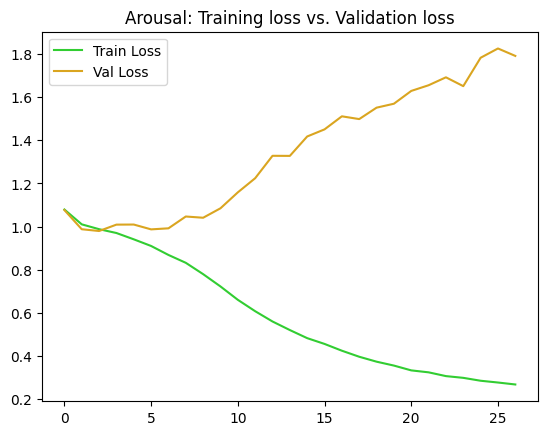

In [ ]:
# @title Plot the Training loss vs. validation loss for the Arousal Model

n = "Arousal: Training loss vs. Validation loss"
plot_metric(train_metric=Best_Losses_arousal['train'], eval_metric=Best_Losses_arousal['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



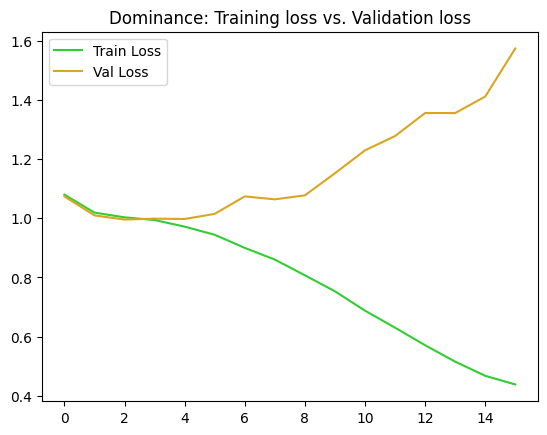

In [ ]:
# @title Plot the Training loss vs. validation loss for the Dominance Model

n = "Dominance: Training loss vs. Validation loss"
plot_metric(train_metric=Best_Losses_dominance['train'], eval_metric=Best_Losses_dominance['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



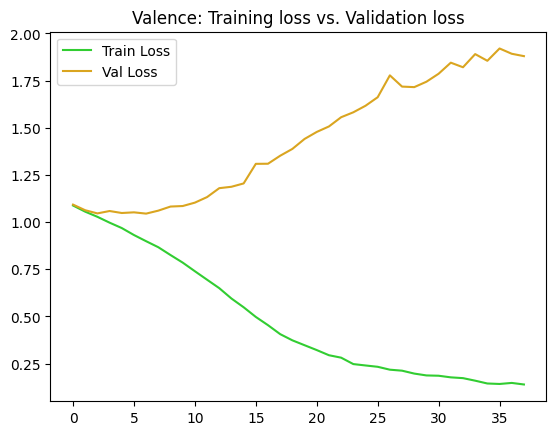

In [ ]:
# @title Plot the Training loss vs. validation loss for the Valence Model

n = "Valence: Training loss vs. Validation loss"
plot_metric(train_metric=Best_Losses_valence['train'], eval_metric=Best_Losses_valence['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



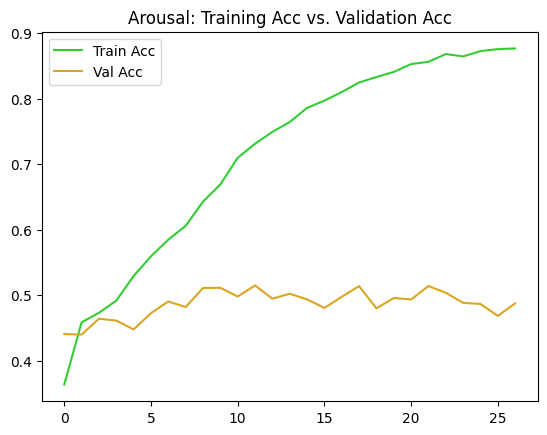

In [ ]:
# @title Plot the Training and Validation Accuracy for the Arousal Model
n = "Arousal: Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs_arousal['train'], eval_metric=Best_Accs_arousal['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)


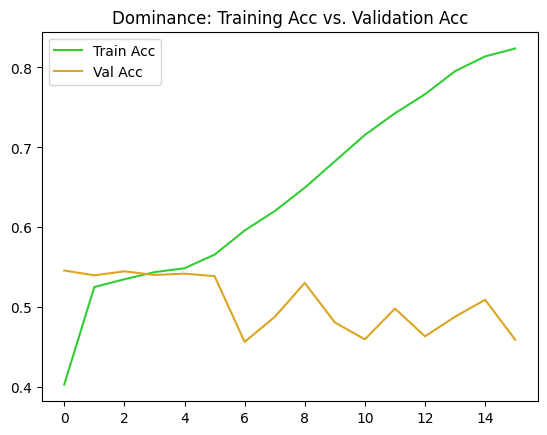

In [ ]:
# @title Plot the Training and Validation Accuracy for the Dominance Model
n = "Dominance: Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs_dominance['train'], eval_metric=Best_Accs_dominance['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)


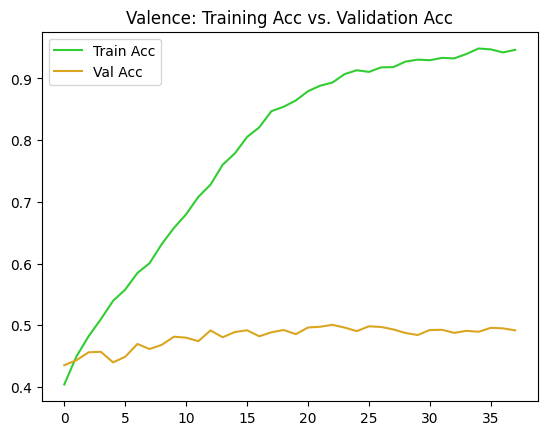

In [ ]:
# @title Plot the Training and Validation Accuracy for the Valence Model
n = "Valence: Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs_valence['train'], eval_metric=Best_Accs_valence['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)




Accuracy_score: 0.4869745620859561


classification_report: 
              precision    recall  f1-score   support

        Alta       0.21      0.08      0.12      4887
       Media       0.49      0.56      0.52     18846
       Bassa       0.51      0.52      0.52     18684

    accuracy                           0.49     42417
   macro avg       0.40      0.39      0.39     42417
weighted avg       0.47      0.49      0.47     42417





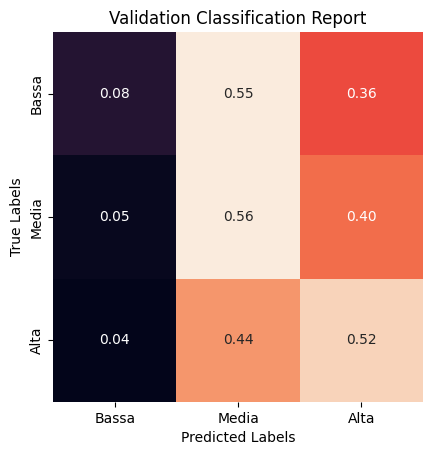

In [ ]:
# @title Confusion Matrix for the best model on the validation set for Arousal
confusion_matrix_score(ytest=Best_Labels_Preds_arousal['labels'], ypred=Best_Labels_Preds_arousal['preds'], name='Validation ')



Accuracy_score: 0.5050428843710292


classification_report: 
              precision    recall  f1-score   support

        Alta       0.37      0.19      0.25      6864
       Media       0.55      0.80      0.65     13664
       Bassa       0.28      0.12      0.17      4656

    accuracy                           0.51     25184
   macro avg       0.40      0.37      0.36     25184
weighted avg       0.45      0.51      0.45     25184





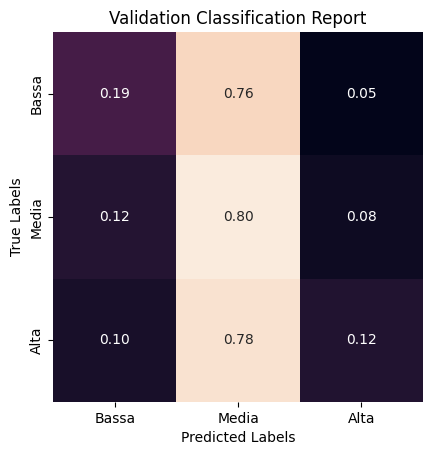

In [ ]:
# @title Confusion Matrix for the best model on the validation set for Dominance
confusion_matrix_score(ytest=Best_Labels_Preds_dominance['labels'], ypred=Best_Labels_Preds_dominance['preds'], name='Validation ')



Accuracy_score: 0.48163586447033613


classification_report: 
              precision    recall  f1-score   support

        Alta       0.44      0.35      0.39     16568
       Media       0.50      0.63      0.56     25954
       Bassa       0.49      0.38      0.43     17214

    accuracy                           0.48     59736
   macro avg       0.47      0.45      0.46     59736
weighted avg       0.48      0.48      0.47     59736





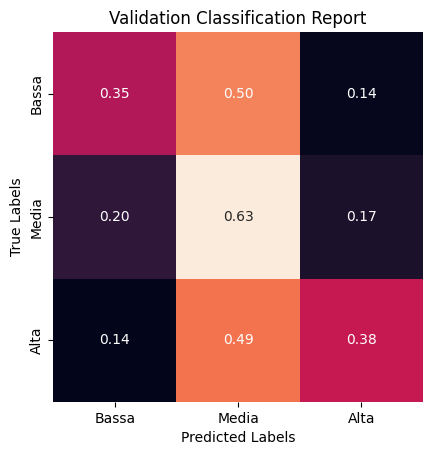

In [ ]:
# @title Confusion Matrix for the best model on the validation set for Valence
confusion_matrix_score(ytest=Best_Labels_Preds_valence['labels'], ypred=Best_Labels_Preds_valence['preds'], name='Validation ')

In [ ]:
# @title Test the Arousal Model on the Arousal test set

Labels_Preds_test_arousal = gs_model_lstm_arousal.predict(model=gs_model_lstm_arousal.best_model, test_loader=test_lstm_dataloader_arousal)
# Loss: 1.9611015109454883, Accuracy: 0.4964810311794281


Loss: 1.9611015109454883, Accuracy: 0.4964810311794281




Accuracy_score: 0.4844597927972373


classification_report: 
              precision    recall  f1-score   support

        Alta       0.18      0.10      0.13       227
       Media       0.53      0.37      0.44       930
       Bassa       0.49      0.70      0.58       870

    accuracy                           0.48      2027
   macro avg       0.40      0.39      0.38      2027
weighted avg       0.47      0.48      0.46      2027





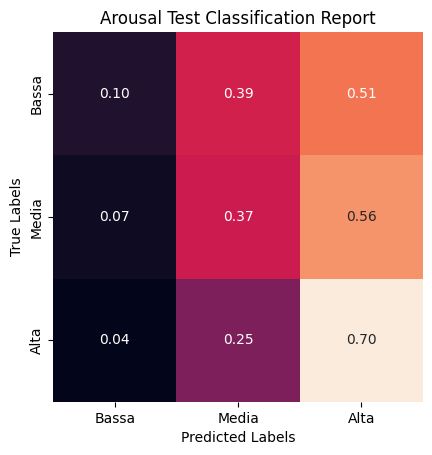

In [ ]:
# Confusion Matrix for the best model on the test set for arousal
confusion_matrix_score(ytest=Labels_Preds_test_arousal['labels'], ypred=Labels_Preds_test_arousal['preds'], name='Arousal Test ')

In [ ]:
# @title Test the Dominace Model on the Dominance test set

Labels_Preds_test_dominance = gs_model_lstm_dominance.predict(model=gs_model_lstm_dominance.best_model, test_loader=test_lstm_dataloader_dominance)
# Loss: 1.8345664248746985, Accuracy: 0.4310032059164608

Loss: 1.8345664248746985, Accuracy: 0.4310032059164608




Accuracy_score: 0.43117908238776514


classification_report: 
              precision    recall  f1-score   support

        Alta       0.43      0.32      0.36       544
       Media       0.59      0.46      0.52      1120
       Bassa       0.24      0.50      0.33       363

    accuracy                           0.43      2027
   macro avg       0.42      0.43      0.40      2027
weighted avg       0.49      0.43      0.44      2027





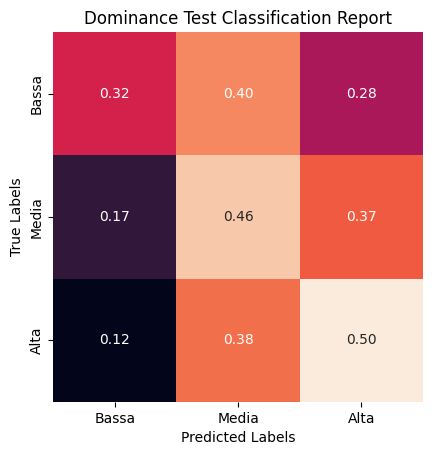

In [ ]:
# Confusion Matrix for the best model on the test set for Dominance
confusion_matrix_score(ytest=Labels_Preds_test_dominance['labels'], ypred=Labels_Preds_test_dominance['preds'], name='Dominance Test ')

In [ ]:
# @title Test the Arousal Model on the Valence test set

Labels_Preds_test_valence = gs_model_lstm_valence.predict(model=gs_model_lstm_valence.best_model, test_loader=test_lstm_dataloader_valence)
# Loss: 2.0945211158079258, Accuracy: 0.46297289518749013

Loss: 2.0945211158079258, Accuracy: 0.46297289518749013




Accuracy_score: 0.4568327577701036


classification_report: 
              precision    recall  f1-score   support

        Alta       0.48      0.39      0.43       576
       Media       0.49      0.44      0.46       849
       Bassa       0.41      0.55      0.47       602

    accuracy                           0.46      2027
   macro avg       0.46      0.46      0.45      2027
weighted avg       0.46      0.46      0.46      2027





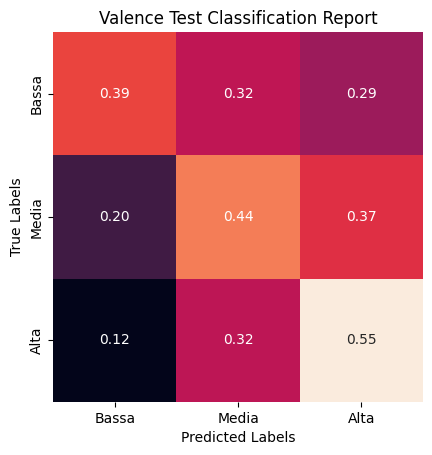

In [ ]:
# Confusion Matrix for the best model on the test set for Valence
confusion_matrix_score(ytest=Labels_Preds_test_valence['labels'], ypred=Labels_Preds_test_valence['preds'], name='Valence Test ')

In [ ]:
# @title Do Prediction on the 3 models
# Then for the forall prediction, we can
# 1. average the predictions from the 3 models, then take the argmax of the averaged prediction, or
# 2. Take the prediction of the model that has the max probability, or
# 3. Do majority voting, that is, take the mode of the predictions from the 3 models

# Labels_Preds_test = gs_model_bilstm.predict(model=gs_model_bilstm.best_model, test_loader=test_lstm_dataloader)

class PredWith3Models:
  """Do Prediction on the 3 models, then for all prediction, we can
      1. average the predictions from the 3 models, then take the argmax of the averaged prediction, or
      2. Take the prediction of the model that has the max probability, or
      3. Do majority voting, that is, take the mode of the predictions from the 3 models

    methods:
      avg_pred(self, texts: Union[List[str], pd.DataFrame], labels: List[int], verbose: bool = True)
      all_pred(self, texts: Union[List[str], pd.DataFrame], labels: List[int], verbose: bool = True)
      majority_vote(self, texts: Union[List[str], pd.DataFrame], labels: List[int], verbose: bool = True)

  """
  def __init__(self,
               model_arousal: nn.Module = gs_model_lstm_arousal.best_model,
               model_dominance: nn.Module = gs_model_lstm_dominance.best_model,
               model_valence: nn.Module = gs_model_lstm_valence.best_model
               ):
      self.model_arousal = model_arousal
      self.model_dominance = model_dominance
      self.model_valence = model_valence

  def _helper(self, texts: Union[List[str], pd.DataFrame], labels: Optional[List[int]]=None, verbose: bool = True):
      """Args:
          texts (Union[List[str], pd.DataFrame]): list of texts to be predicted by the models in a list of strings or
          in a dataframe format with a column named 'text'
          labels (List[int]): list of labels for each text in texts.
      """

      if not isinstance(texts, pd.core.frame.DataFrame):
          texts = pd.DataFrame(texts, columns=['text'])

      outputs_softmax_arousal, outputs_arousal = self.model_arousal.predict(texts, vocabulary=train_lstm_arousal.vocabulary)
      outputs_softmax_dominance, outputs_dominance = self.model_dominance.predict(texts, vocabulary=train_lstm_dominance.vocabulary)
      outputs_softmax_valence, outputs_valence = self.model_valence.predict(texts, vocabulary=train_lstm_valence.vocabulary)

      if labels:
          print(f"Labels: {labels}")
          print(f"Arousal: \n(Correct labels, Predicted outputs, Correct labels == Predicted labels): \n\t{ list(zip(labels, outputs_arousal, list(labels == outputs_arousal)))}")
          print(f"Dominance: \n(Correct labels, Predicted outputs, Correct labels == Predicted labels): \n\t{ list(zip(labels, outputs_dominance, list(labels == outputs_dominance)))}")
          print(f"Arousal: \n(Correct labels, Predicted outputs, Correct labels == Predicted labels): \n\t{ list(zip(labels, outputs_dominance, list(labels == outputs_dominance)))}")

      if verbose:
          print(f"\nArousal outputs_softmax: \n{outputs_softmax}")
          print(f"\nDominance outputs_softmax: \n{outputs_softmax}")
          print(f"\nValence outputs_softmax: \n{outputs_softmax}")

      return (
          outputs_softmax_arousal, torch.tensor(outputs_arousal),
          outputs_softmax_dominance, torch.tensor(outputs_dominance),
          outputs_softmax_valence, torch.tensor(outputs_valence)
      )

  def avg_pred(self, texts: Union[List[str], pd.DataFrame], labels: Optional[List[int]]=None, verbose: bool = True):
      """Average the predictions from the 3 models

      Args:
          texts (Union[List[str], pd.DataFrame]): list of texts to be predicted by the models in a list of strings or
          in a dataframe format with a column named 'text'
          labels (List[int]): list of labels for each text in texts.
      """

      (
          outputs_softmax_arousal, outputs_arousal,
          outputs_softmax_dominance, outputs_dominance,
          outputs_softmax_valence, outputs_valence
      ) = self._helper(texts, labels, verbose)

      # Stack the predictions' probabilities from the 3 models. Shape: (3, len(texts), 3)
      stack_tns = torch.stack([outputs_softmax_arousal, outputs_softmax_dominance, outputs_softmax_valence], dim=0);

      # Flatten the probs of each model as a sinlge Tensor of ints.
      stack_tns_reshaped = stack_tns.reshape(3, -1); # Shape: (3, len(texts)*3)

      # Average the probs along each models probs -> 0
      avg_tns = stack_tns_reshaped.mean(dim=0) # Shape: (len(texts)*3)

      # Reshape the average probs so that each row has the probs of the 3 classes
      avg_tns_reshaped = avg_tns.reshape(-1, 3) # Shape: (len(texts), 3)

      # Softmax the average probs
      softmax_tns = avg_tns_reshaped.softmax(dim=1) # Shape: (len(texts), 3)

      # Take the argmax along the 3 classes
      argmax_tns = softmax_tns.argmax(dim=1).to('cpu') # Shape: (len(texts),)
      argmax_list = argmax_tns.tolist()
      # print(f"argmax_tns: {argamx_list}")

      acc = (torch.tensor(labels) == argmax_tns)
      acc = acc.sum()/len(acc)
      print(f"Avg Accuracy score: {acc}")

      if labels:
          print(f"Avg Predictions: \n(Correct labels, Predicted outputs, Correct labels == Predicted labels): \n\t{ list(zip(labels[:5], argmax_list[:5], (torch.tensor(labels[:5]) == argmax_tns[:5]).tolist()))}")
      else:
          print(f"Avg Predictions -> Predicted labels: \n\t{ argmax_list[:5]}")

      return acc

  def max_pred(self, texts: Union[List[str], pd.DataFrame], labels: Optional[List[int]]=None, verbose: bool = True):
      """For each sample/text, take the prediction of the model that has the max probability

      Args:
          texts (Union[List[str], pd.DataFrame]): list of texts to be predicted by the models in a list of strings or
          in a dataframe format with a column named 'text'
          labels (List[int]): list of labels for each text in texts.
      """

      (
          outputs_softmax_arousal, outputs_arousal,
          outputs_softmax_dominance, outputs_dominance,
          outputs_softmax_valence, outputs_valence
      ) = self._helper(texts, labels, verbose)



      # Get the max values and indices along the class/label dimension
      t1_val, t1_idx = torch.max(outputs_softmax_arousal, dim=1)
      t2_val, t2_idx = torch.max(outputs_softmax_dominance, dim=1)
      t3_val, t3_idx = torch.max(outputs_softmax_valence, dim=1)

      # Stack the tensors along the 3 datasets dimension and get the max values and indices
      t_stack = torch.stack([t1_val, t2_val, t3_val], dim=0)

      # Get the max values and indices along the 3 datasets dimension
      ts_val, ts_idx = torch.max(t_stack, dim=0)

      appned_list = []
      for idx, tidx in enumerate(ts_idx):
          if tidx == 0:
              appned_list.append(t1_idx[idx].item())
          elif tidx == 1:
              appned_list.append(t2_idx[idx].item())
          else:
              appned_list.append(t3_idx[idx].item())

      acc = (torch.tensor(appned_list) == torch.tensor(labels))
      acc = acc.sum()/len(acc)
      print(f"Max pred Accuracy: {acc}")

      # print(f"""ts_idx: {ts_idx.tolist()}
      #           \nArousal max idx: {t1_idx.tolist()} \n Dominance max  idx: {t2_idx.tolist()} \n Valence max  idx: {t3_idx.tolist()}
      #           \nArousal max  val: {t1_val.tolist()} \nDominance max  val: {t2_val.tolist()} \nValence max  val: {t3_val.tolist()}
      #           \nFinal max preds of the 3 models: {appned_list}
      #       \n""")

      if labels:
          print(f"""\nMax Predictions: \n(Correct labels, Predicted max outputs, Correct labels == Predicted max labels):
               \n\t{ list(zip(labels[:5], appned_list[:5], (torch.tensor(labels[:5]) == torch.tensor(appned_list[:5])).tolist()))}
                """)
      else:
          print(f"\nMax Predictions -> Predicted max labels: \n\t{ appned_list[:5]}")

      return acc

  def majority_voting(self, texts: Union[List[str], pd.DataFrame], labels: Optional[List[int]]=None, verbose: bool = True):
      """Take the prediction of the model that has the max probability

      Args:
          texts (Union[List[str], pd.DataFrame]): list of texts to be predicted by the models in a list of strings or
          in a dataframe format with a column named 'text'
          labels (List[int]): list of labels for each text in texts.
      """

      (
          outputs_softmax_arousal, outputs_arousal,
          outputs_softmax_dominance, outputs_dominance,
          outputs_softmax_valence, outputs_valence
      ) = self._helper(texts, labels, verbose)

      # Stack the predictions' labels from the 3 models. Shape: (3, len(texts))
      stack_tns = torch.stack([outputs_arousal, outputs_dominance, outputs_valence], dim=0);

      # Take mode along the 3 classes
      mode_list = stack_tns.mode(dim=0)[0] # Shape: (len(texts))
      # print(f"\nMode labels: \n{mode_list}")

      acc = (mode_list == torch.tensor(labels))
      acc = acc.sum()/len(acc)
      print(f"Mode pred Accuracy: {acc}")

      if labels:
          print(f"""Mode Predictions: \n(Correct labels, Predicted mode labels, Correct labels == Predicted mode labels):
                \n\t{ list(zip(labels[:5], mode_list[:5], (torch.tensor(labels[:5]) == mode_list[:5]).tolist()))}
                """)
      else:
          print(f"Mode Predictions -> Predicted mode labels: \n\t{ mode_list.tolist()[:5]}")

      return acc

preds_with_models = PredWith3Models(model_arousal = gs_model_lstm_arousal.best_model,
                                    model_dominance = gs_model_lstm_dominance.best_model,
                                    model_valence = gs_model_lstm_valence.best_model
                                    )

In [ ]:
logger.setLevel(logging.ERROR)

random.seed(seed)
idxs = [random.randint(0, len(test_lstm_arousal.dataframe)) for _ in range(len(test_lstm_arousal.dataframe))]

# Same text for all 3, but labels may differ
texts = test_lstm_arousal.dataframe['text'].iloc[idxs]

# TODO: Add the other labels as well
labels = test_lstm_arousal.dataframe['label_remapped'].iloc[idxs].tolist()
# print(f"Texts: {texts}\nLabels: {labels}\n")

text_df = pd.DataFrame(texts, columns=['text'])


In [ ]:
# @title Average prediction of 3 models

avg_acc = preds_with_models.avg_pred(texts = text_df, labels=labels, verbose=True)
# preds_with_models.avg_pred(texts = texts, labels=None, verbose=True)

Labels: [2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1

In [ ]:
print(f"Avg Acc: {avg_acc}")
# Avg Acc: 0.4238603413105011

Avg Acc: 0.4238603413105011


In [ ]:
# @title Max prediction of 3 models

max_acc = preds_with_models.max_pred(texts = text_df, labels=labels, verbose=True)

Labels: [2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1

In [ ]:
print(f"Max acc: {max_acc}")
# Max acc: 0.4272550940513611

Max acc: 0.4272550940513611


In [ ]:
# @title Majority prediction of 3 models

majority_acc = preds_with_models.majority_voting(texts = text_df, labels=labels)

Labels: [2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1

In [ ]:
print(f"Majority Acc: {majority_acc}")
# Majority Acc: 0.4238603413105011

Majority Acc: 0.4238603413105011


### BiGRU

In [ ]:
# @title Inherit from the BiLSTM model

class BiGRUModel(BiLSTMModel):

    def __init__(self,
                  num_classes: int=3,
                  optimizer: torch.optim.Optimizer=None,
                  criterion=nn.CrossEntropyLoss(),
                  scheduler=None,
                  vocab_size: int=config.max_sequence_length,
                  embedding_type: Optional[str]='custom',
                  padding_idx: int=padding_idx,
                  embedding_dim: int=config.embedding_size,
                  lstm_num_layers: int=2,
                  lstm_dropout: float=0.2,
                  bidirectional: bool=True
              ) -> None:

        # call the super of the BiLSTM model
        super().__init__(num_classes=num_classes,
                  optimizer=optimizer,
                  criterion=criterion,
                  scheduler=scheduler,
                  vocab_size=vocab_size,
                  embedding_type=embedding_type,
                  padding_idx=padding_idx,
                  embedding_dim=embedding_dim,
                  lstm_num_layers=lstm_num_layers,
                  lstm_dropout=lstm_dropout,
                  bidirectional=bidirectional
              )

        # Override the bilstm field to bigru
        self.bilstm = nn.GRU(
            input_size=embedding_dim,
            hidden_size=embedding_dim,
            num_layers=lstm_num_layers,
            batch_first=True,
            dropout=lstm_dropout,
            bidirectional=bidirectional,
            device=config.device
        )


In [ ]:
# @title Number of Parameters of our BiGRU model

# Initialize the model
bigru_model = BiGRUModel(num_classes=config.num_classes,
                            optimizer=None,
                            criterion=nn.CrossEntropyLoss(),
                            scheduler=None,
                            vocab_size=vocab_size,
                            embedding_type='custom',
                            padding_idx=padding_idx,
                            embedding_dim=config.embedding_size,
                            lstm_num_layers=2,
                            lstm_dropout=0.2,
                            bidirectional=True
                            )
num_params = bigru_model.num_parameters()
print(f'Number of parameters of the BiLSTM model with {2} layers: {num_params}')

Number of parameters of the BiLSTM model with 2 layers: 8237403


In [ ]:
# @title Train the model

# use the grid search 3
gs_model_bigru = GridSearch3()

Best_Losses, Best_Accs, Best_Labels_Preds = gs_model_bigru.fit(model=None, # Start from scratch for each combination of param_grid
                                                              train_loader=train_lstm_dataloader,
                                                              val_loader=val_lstm_dataloader,
                                                              num_epochs=config.epochs,
                                                              patience=config.patience,
                                                              use_pretrain=False,
                                                              enable_extras=True,
                                                              lstm_num_layers=4, # ignored for now
                                                              lstm_dropout=0.2,
                                                              bidirectional=True
                                                              )





################################################################################ 
Starting training | Embedding type: custom | Num BiLSTM layers : 2 | optimizer: AdamW | lr_scheduler: ReduceLROnPlateau

-------------------------------------------------------------------------------- 
Epoch 1/300 | Train Loss: 1.057137 | Train Acc: 42.630208333333336% | Val Loss: 1.026469 | Val Acc: 45.62088815789473%
Model saved | Epoch: 0 | best_metric: 45.62088815789473%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 2/300 | Train Loss: 0.991247 | Train Acc: 50.411458333333336% | Val Loss: 1.011738 | Val Acc: 48.416940789473685%
Model saved | Epoch: 1 | best_metric: 48.416940789473685%
Epochs since improvement: 0, remaining='patience'-'epochs_since_improvement': 15

-------------------------------------------------------------------------------- 
Epoch 3/300 | Train Loss: 0.9581

In [ ]:
# Final Best Parameters: Embedding type: custom | Num BiLSTM Layers: 6 | Optimizer: AdamW, Learning Rate Scheduler: ReduceLROnPlateau
# Final Best Validation Accuracy: 0.6060855388641357

In [ ]:
# @title Count the number of parameters

num_params = gs_model_bigru.best_model.num_parameters()
print(f"Number of parameters of the model is: {num_params}")

Number of parameters of the model is: 13469403


In [ ]:
Best_Losses = gs_model_bigru.Best_Losses
Best_Accs = gs_model_bigru.Best_Accs
Best_Labels_Preds = gs_model_bigru.Best_Labels_Preds

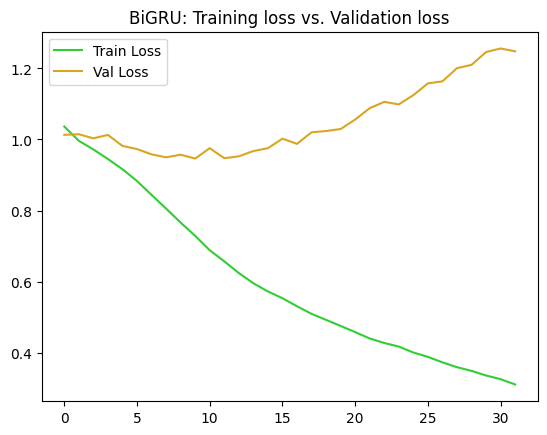

In [ ]:
n = "BiGRU: Training loss vs. Validation loss"
#plot_metric(train_metric=train_loss_history_r3d, eval_metric=val_loss_history_r3d, train_metric_name="R3D train", eval_metric_name="R3D val", plot_name=n, c1=color1, c2=color2)
plot_metric(train_metric=Best_Losses['train'], eval_metric=Best_Losses['val'], train_metric_name="Train Loss", eval_metric_name="Val Loss", plot_name=n, c1=color3, c2=color4)



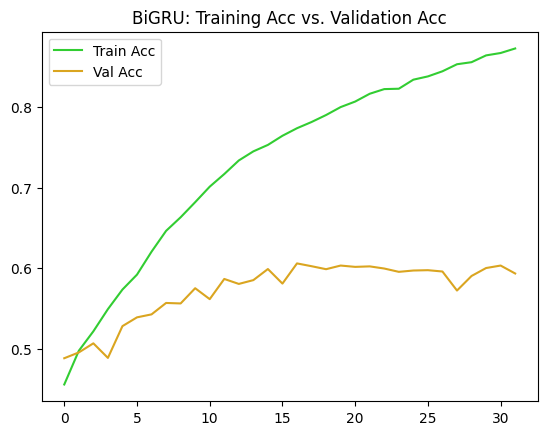

In [ ]:

n = "BiGRU: Training Acc vs. Validation Acc"
plot_metric(train_metric=Best_Accs['train'], eval_metric=Best_Accs['val'], train_metric_name="Train Acc", eval_metric_name="Val Acc", plot_name=n, c1=color3, c2=color4)




Accuracy_score: 0.572890625


classification_report: 
              precision    recall  f1-score   support

        Alta       0.59      0.44      0.50     34016
       Media       0.58      0.68      0.62     72928
       Bassa       0.56      0.50      0.53     46656

    accuracy                           0.57    153600
   macro avg       0.57      0.54      0.55    153600
weighted avg       0.57      0.57      0.57    153600





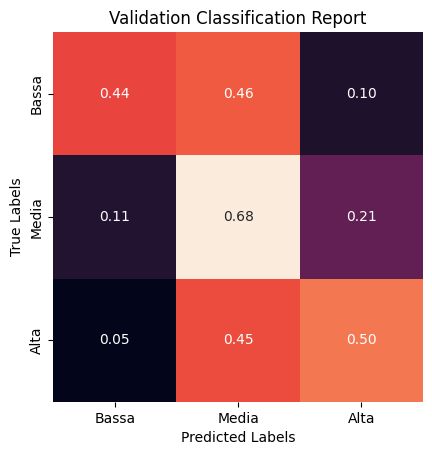

In [ ]:
# Confusion Matrix for the best model on the validation set
confusion_matrix_score(ytest=Best_Labels_Preds['labels'], ypred=Best_Labels_Preds['preds'], name='Validation ')

In [ ]:
# Test the model
Labels_Preds_test = gs_model_bigru.predict(model=gs_model_bigru.best_model, test_loader=test_lstm_dataloader)

Loss: 1.6683049785847566, Accuracy: 0.500622570514679




Accuracy_score: 0.5012932428063369


classification_report: 
              precision    recall  f1-score   support

        Alta       0.42      0.23      0.30      1374
       Media       0.53      0.69      0.60      2953
       Bassa       0.47      0.40      0.43      1859

    accuracy                           0.50      6186
   macro avg       0.47      0.44      0.44      6186
weighted avg       0.49      0.50      0.48      6186





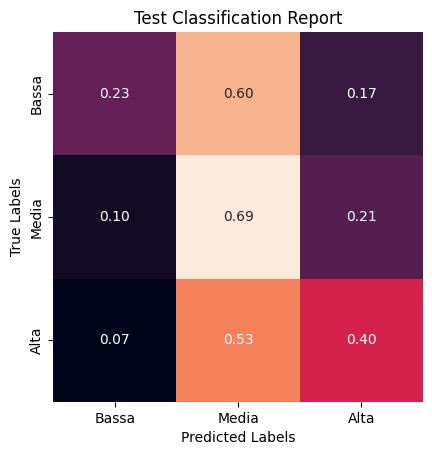

In [ ]:
# Confusion Matrix for the best model on the test set
confusion_matrix_score(ytest=Labels_Preds_test['labels'], ypred=Labels_Preds_test['preds'], name='Test ')